## Understanding Flu Vaccine Hesitancy:A Machine Learning Approach for Informed Public Health Intervention ##

### PROBLEM STATEMENT ###

Vaccination has greatly improved public health, yet vaccine skepticism is causing immunization rates
to decline. This trend prompted research into vaccination attitudes.

Amid this, flu vaccine hesitancy is a major concern, hindering efforts against seasonal flu outbreaks.
Despite the flu causing millions of hospitalizations and 52,000 deaths annually, only 51.4% received the
vaccine in the 2021-22 season. Hesitancy leads to disease spread, strains healthcare, and may cause co-infections, causing economic burdens and disrupting daily life.

Prompt flu vaccination is crucial, especially during fall and winter when flu and COVID-19 can spread
together. It reduces co-infection risk and eases healthcare strain.

Flu vaccine hesitancy is driven by factors like misinformation, safety fears, beliefs, and access.
Understanding these helps design effective interventions.

The Ministry of Health assigned us to address flu vaccine hesitancy. Our study uses machine learning
to predict flu vaccine likelihood. By analyzing data, we empower experts to understand low
vaccination rates and overcome barriers. This bridges the gap between hesitancy and effective
interventions, creating a healthier community.

### BUSINESS OVERVIEW ###

This project is aimed to provide insights into predicting seasonal flu vaccination status accurately and identifying key factors influencing vaccination decisions. The results from this study could contribute to optimizing pro-vaccination efforts and targeting specific subgroups to maximize the benefits of herd immunity, particularly in the context of seasonal flu.

### Main Objective ###

To utilize machine learning to understand flu vaccine hesitancy by predicting the likelihood of individuals receiving their seasonal flu vaccines.

### Specific Objectives ###

1.To identify socio-cultural, psychological, and communicationrelated factors that affect flu vaccine hesitancy.

2.Develop a predictive model for vaccine hesitancy based on historical data.

3.Develop tailored recommendations to increase flu vaccine uptake.

### Data Understanding ###

Target variable: Seasonal_vaccine - Whether respondent received seasonal flu vaccine or not.

Socio-Demographic and Personal Information:

Age, gender, race, income level and education 
employment_status, employment_industry, employment_occupation
Health-related Variables:
health_insurance, behavioral_antiviral_meds, behavioral_avoidance
opinion_seas_vacc_effective, opinion_seas_risk, opinion_seas_sick_from_vacc
Household Information:
household_adults, household_children.
 





**Importing Libraries**

In [135]:
import warnings
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn import tree
from sklearn.svm import SVC
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
pd.set_option('display.max_columns', None)
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,\
confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc, f1_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier,\
GradientBoostingClassifier

**1. DATA COLLECTION**

In [136]:
# one contains features and the other contains the corresponding labels
features = pd.read_csv('data/set_features.csv')
labels = pd.read_csv('data/set_labels.csv')
display(features.head())
labels.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [137]:
# concatenate the features and labels into a single DataFrame for cleaning and exploration
df = pd.concat([features, labels.drop('respondent_id', axis=1)], axis=1)
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [138]:
df.shape

(26707, 38)

In [139]:
#Displaying the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [140]:
#Displaying the numeric summary of the dataset
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [141]:
#Checking the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

This step involves loading and inspecting the dataset provided. I have loaded the datasets, that is, the flu dataset and the target variables datasets. Afterwards, I merged the target variables and the flu dataset.
The following dataset has 26707 rows and 38 columns.
The dataset contains both numerical and categorical data.

The variables `hhs_geo_region`, `employment_industry`, and `employment_occupation` are encoded as random strings and correspond to specific geographic regions, industries, and occupations. The CDC has not provided the meanings of these strings to protect the anonymity of respondents. Nonetheless, our model can utilize this information to enhance prediction accuracy. Including these variables in our analysis will allow us to determine their relevance in predicting an individual's likelihood of obtaining a vaccine, even if we cannot establish a direct connection to specific regions or jobs.

# 4. Data cleaning

## 4.1 Dropping irrelevant columns

In [142]:
# focus of our problem is on seasonal flu vaccines,information most specific to h1n1 won't be needed

df.drop(columns=['opinion_h1n1_vacc_effective',
                 'opinion_h1n1_risk',
                 'opinion_h1n1_sick_from_vacc',
                 'doctor_recc_h1n1','h1n1_concern',
                 'h1n1_knowledge','h1n1_vaccine'], axis=1, inplace=True)

## 4.2 Checking for duplicates

In [143]:
# Checking for duplicates
duplicate_rows = df[df.duplicated()]
# Print the duplicate rows
print(duplicate_rows)


Empty DataFrame
Columns: [respondent_id, behavioral_antiviral_meds, behavioral_avoidance, behavioral_face_mask, behavioral_wash_hands, behavioral_large_gatherings, behavioral_outside_home, behavioral_touch_face, doctor_recc_seasonal, chronic_med_condition, child_under_6_months, health_worker, health_insurance, opinion_seas_vacc_effective, opinion_seas_risk, opinion_seas_sick_from_vacc, age_group, education, race, sex, income_poverty, marital_status, rent_or_own, employment_status, hhs_geo_region, census_msa, household_adults, household_children, employment_industry, employment_occupation, seasonal_vaccine]
Index: []


# 4.3 Checking for any placeholders

In [144]:
for column in df.columns:
    unique_values = df[column].unique()
    placeholders = [value for value in unique_values if str(value).strip().lower() in ['placeholder', 'na', 'n/a', 'none']]
    placeholder_count = len(placeholders)    
    unique_value_counts = df[column].value_counts()    
    print(f"Column: '{column}'")
    print(f"Unique value counts:")
    print(unique_value_counts)
    print()
    print(f"Placeholders:")
    print(placeholders)
    print(f"Count of placeholders: {placeholder_count}\n")

Column: 'respondent_id'
Unique value counts:
respondent_id
0        1
17736    1
17812    1
17811    1
17810    1
        ..
8898     1
8897     1
8896     1
8895     1
26706    1
Name: count, Length: 26707, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'behavioral_antiviral_meds'
Unique value counts:
behavioral_antiviral_meds
0.0    25335
1.0     1301
Name: count, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'behavioral_avoidance'
Unique value counts:
behavioral_avoidance
1.0    19228
0.0     7271
Name: count, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'behavioral_face_mask'
Unique value counts:
behavioral_face_mask
0.0    24847
1.0     1841
Name: count, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'behavioral_wash_hands'
Unique value counts:
behavioral_wash_hands
1.0    22015
0.0     4650
Name: count, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'behavioral_large_gatherings'
Unique va

# 4.4 Checking for any missing values

In [145]:
# creating a Pandas DataFrame displaying the number of null values for 
# each column in the original DataFrame, 
# as well as the total percent of each column that is made up of null values. 
def check_null(df):
    missing_vals = pd.DataFrame()
    missing_vals['Number of Nulls'] = df.isna().sum()
    missing_vals['% Null'] = (df.isna().sum() / len(df)) * 100
    
    missing_vals = missing_vals.sort_values(by='Number of Nulls')
    
    return missing_vals

check_null(df)

,Number of Nulls,% Null
respondent_id,0,0.000000
census_msa,0,0.000000
hhs_geo_region,0,0.000000
sex,0,0.000000
race,0,0.000000
age_group,0,0.000000
seasonal_vaccine,0,0.000000
behavioral_face_mask,19,0.071142
behavioral_wash_hands,42,0.157262
behavioral_antiviral_meds,71,0.265848


Since the complete dataset contains a significant number of observations (26,707), and most columns have only a small proportion of missing values, any record with missing information in columns containing less than 5% missing values will be excluded. As demonstrated earlier, the affected columns include:

 - `behavioral_antiviral_meds`
 - `behavioral_avoidance`
 - `behavioral_face_mask` 
 - `behavioral_wash_hands`
 - `behavioral_large_gatherings` 
 - `behavioral_outside_home`
 - `behavioral_touch_face` 
 - `chronic_med_condition`
 - `child_under_6_months` 
 - `health_worker` 
 - `opinion_seas_vacc_effective`
 - `opinion_seas_risk` 
 - `opinion_seas_sick_from_vacc` 
 - `household_adults`
 - `household_children`

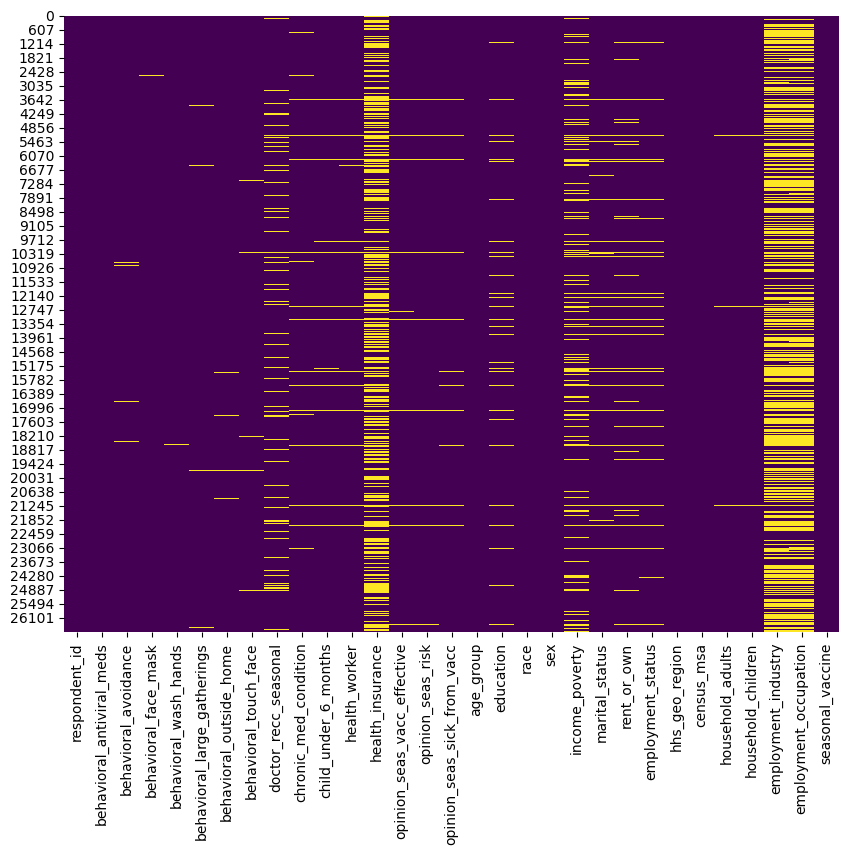

In [146]:
# Assuming 'df' is your DataFrame creating a visualization to understand missing values 
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.show()


In [147]:
# slice out DataFrame for individuals Not in Labor Force
not_in_labor_force = df[df['employment_status']=='Not in Labor Force']

# display the number and percent of NaN's in each column
display(check_null(not_in_labor_force))

,Number of Nulls,% Null
respondent_id,0,0.000000
census_msa,0,0.000000
hhs_geo_region,0,0.000000
employment_status,0,0.000000
sex,0,0.000000
race,0,0.000000
age_group,0,0.000000
seasonal_vaccine,0,0.000000
child_under_6_months,1,0.009774
opinion_seas_sick_from_vacc,4,0.039097


In [148]:
# # slice out DataFrame for 'Unemployed' individuals
unemployed = df[df['employment_status']=='Unemployed']

# # display the number and percent of NaN's in each column
check_null(unemployed)

,Number of Nulls,% Null
respondent_id,0,0.000000
household_children,0,0.000000
household_adults,0,0.000000
census_msa,0,0.000000
hhs_geo_region,0,0.000000
employment_status,0,0.000000
sex,0,0.000000
race,0,0.000000
age_group,0,0.000000
health_worker,0,0.000000


In [149]:
not_lab_for_ids = list(not_in_labor_force['respondent_id'].index)
unempl_ids = list(unemployed['respondent_id'].index)
all_not_employed_ids = not_lab_for_ids + unempl_ids
len(all_not_employed_ids)

11684

The columns employment_occupation, employment_industry, and health_insurance have the most missing values, at 50.4%, 49.9%, and 46.0% respectively. However, it is important to note that some of these missing values are not due to respondents declining to answer, but rather because they are not applicable. For example, 10,231 respondents who are classified as 'Not in Labor Force' have missing values for employment_occupation and employment_industry. Similarly, 1,453 unemployed respondents have missing values for these columns. In these cases, it is more appropriate to consider employment_occupation and employment_industry as 'not applicable' rather than missing values.

There are also evident patterns in missing values. For example, respondents who declined to answer about one aspect, such as whether their doctor recommended a specific vaccine, often did the same for other related questions. This trend was also observed for questions regarding chronic medical conditions, having a child under 6 months, being a health worker, opinion questions, income, education, personal and home life questions.

These patterns suggest that treating missing information for certain variables as a distinct category rather than dropping it altogether may be more meaningful. This is because it appears to represent a specific type of respondent that constitutes a noteworthy portion of the sample population

In [150]:
# The function accepts a Pandas DataFrame along with a designated column name, 
# and returns a new Pandas DataFrame presenting distinct values within that column, 
# accompanied by their respective occurrence counts. By default, the function also includes a tally of NaN values.
def check_unique(df, col, dropna=False):
    unique_vals = pd.DataFrame(df[col].value_counts(dropna=dropna))
    
    return unique_vals
       
for col in df.columns:
    display(check_unique(df, col))

,count
respondent_id,
0,1
17736,1
17812,1
17811,1
17810,1
...,...
8898,1
8897,1
8896,1


,count
behavioral_antiviral_meds,
0.0,25335
1.0,1301
NaN,71


,count
behavioral_avoidance,
1.0,19228
0.0,7271
NaN,208


,count
behavioral_face_mask,
0.0,24847
1.0,1841
NaN,19


,count
behavioral_wash_hands,
1.0,22015
0.0,4650
NaN,42


,count
behavioral_large_gatherings,
0.0,17073
1.0,9547
NaN,87


,count
behavioral_outside_home,
0.0,17644
1.0,8981
NaN,82


,count
behavioral_touch_face,
1.0,18001
0.0,8578
NaN,128


,count
doctor_recc_seasonal,
0.0,16453
1.0,8094
NaN,2160


,count
chronic_med_condition,
0.0,18446
1.0,7290
NaN,971


,count
child_under_6_months,
0.0,23749
1.0,2138
NaN,820


,count
health_worker,
0.0,23004
1.0,2899
NaN,804


,count
health_insurance,
1.0,12697
NaN,12274
0.0,1736


,count
opinion_seas_vacc_effective,
4.0,11629
5.0,9973
2.0,2206
1.0,1221
3.0,1216
NaN,462


,count
opinion_seas_risk,
2.0,8954
4.0,7630
1.0,5974
5.0,2958
3.0,677
NaN,514


,count
opinion_seas_sick_from_vacc,
1.0,11870
2.0,7633
4.0,4852
5.0,1721
NaN,537
3.0,94


,count
age_group,
65+ Years,6843
55 - 64 Years,5563
45 - 54 Years,5238
18 - 34 Years,5215
35 - 44 Years,3848


,count
education,
College Graduate,10097
Some College,7043
12 Years,5797
< 12 Years,2363
NaN,1407


,count
race,
White,21222
Black,2118
Hispanic,1755
Other or Multiple,1612


,count
sex,
Female,15858
Male,10849


,count
income_poverty,
"<= $75,000, Above Poverty",12777
"> $75,000",6810
NaN,4423
Below Poverty,2697


,count
marital_status,
Married,13555
Not Married,11744
NaN,1408


,count
rent_or_own,
Own,18736
Rent,5929
NaN,2042


,count
employment_status,
Employed,13560
Not in Labor Force,10231
NaN,1463
Unemployed,1453


,count
hhs_geo_region,
lzgpxyit,4297
fpwskwrf,3265
qufhixun,3102
oxchjgsf,2859
kbazzjca,2858
bhuqouqj,2846
mlyzmhmf,2243
lrircsnp,2078
atmpeygn,2033


,count
census_msa,
"MSA, Not Principle City",11645
"MSA, Principle City",7864
Non-MSA,7198


,count
household_adults,
1.0,14474
0.0,8056
2.0,2803
3.0,1125
NaN,249


,count
household_children,
0.0,18672
1.0,3175
2.0,2864
3.0,1747
NaN,249


,count
employment_industry,
NaN,13330
fcxhlnwr,2468
wxleyezf,1804
ldnlellj,1231
pxcmvdjn,1037
atmlpfrs,926
arjwrbjb,871
xicduogh,851
mfikgejo,614


,count
employment_occupation,
NaN,13470
xtkaffoo,1778
mxkfnird,1509
emcorrxb,1270
cmhcxjea,1247
xgwztkwe,1082
hfxkjkmi,766
qxajmpny,548
xqwwgdyp,485


,count
seasonal_vaccine,
0,14272
1,12435


In [151]:
# if a person is unemployed, change their 'employment_industry' to 'not_employed'
df.loc[df['employment_status'] == 'Unemployed', 'employment_industry'] = 'not employed'

# if a person is not in the labor force, change their 'employment_industry' to 'not_employed'
df.loc[df['employment_status'] == 'Not in Labor Force', 'employment_industry'] = 'not employed'
check_unique(df, 'employment_industry') 

,count
employment_industry,
not employed,11684
fcxhlnwr,2468
wxleyezf,1804
NaN,1646
ldnlellj,1231
pxcmvdjn,1037
atmlpfrs,926
arjwrbjb,871
xicduogh,851


In [152]:
# if a person is unemployed, change their 'employment_occupation' to 'not_employed'
df.loc[df['employment_status'] == 'Unemployed', 'employment_occupation'] = 'not employed'

# if a person is not in the labor force, change their 'employment_occupation' to 'not_employed'
df.loc[df['employment_status'] == 'Not in Labor Force', 'employment_occupation'] = 'not employed'
check_unique(df, 'employment_occupation')

,count
employment_occupation,
not employed,11684
NaN,1786
xtkaffoo,1778
mxkfnird,1509
emcorrxb,1270
cmhcxjea,1247
xgwztkwe,1082
hfxkjkmi,766
qxajmpny,548


Dropping records if they are missing information in any column comprised of less than 5% missing values.


In [153]:
# create a DataFrame to show columns with % Null between 0 and 5%
null_df = check_null(df)
null_df.drop(index=null_df.loc[null_df['% Null']==0].index, axis=0, inplace=True)
under_5_null = null_df.loc[null_df['% Null']<5]
under_5_null

,Number of Nulls,% Null
behavioral_face_mask,19,0.071142
behavioral_wash_hands,42,0.157262
behavioral_antiviral_meds,71,0.265848
behavioral_outside_home,82,0.307036
behavioral_large_gatherings,87,0.325757
behavioral_touch_face,128,0.479275
behavioral_avoidance,208,0.778822
household_children,249,0.932340
household_adults,249,0.932340
opinion_seas_vacc_effective,462,1.729884


In [154]:
# drop records with null values for the above columns, composed of less than 5% null values
under_5_null_cols = list(under_5_null.index)
df.dropna(subset=under_5_null_cols, inplace=True)

# check out the resulting df
display(check_null(df))
df.shape

,Number of Nulls,% Null
respondent_id,0,0.000000
household_children,0,0.000000
household_adults,0,0.000000
census_msa,0,0.000000
hhs_geo_region,0,0.000000
sex,0,0.000000
race,0,0.000000
age_group,0,0.000000
opinion_seas_risk,0,0.000000
opinion_seas_vacc_effective,0,0.000000


(25026, 31)

For the health_insurance and income_poverty variables, it is reasonable to create a new category for missing values, since these are relatively common. This will allow us to keep all of the data, while still being able to distinguish between respondents who did not answer and those who do not have health insurance or are in poverty.

For the categorical variables education, marital_status, rent_to_own, employment_status, employment_industry, and employment_occupation, it is also reasonable to create a new category for missing values. The pattern of missing values is very similar for these variables, and dropping records with missing values would result in a significant loss of data. Creating a new category for missing values will allow us to keep all of the data, while still being able to distinguish between respondents who did not answer and those who belong to a specific category.

For the doctor_recc_seasonal variable, the pattern of missing values is different from the other categorical variables. In this case, it is probably best to replace the missing values with the string missing. This will allow us to keep the data, while still being able to distinguish between respondents who did not answer and those who did not receive a recommendation from their doctor for a seasonal flu vaccine.

# 5. EXPLORATION DATA ANALYSIS

## 5.1 Univariate Analysis

In [155]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_df = df[numeric_columns]
numeric_df.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,seasonal_vaccine
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,4.0,0.0,0.0,1
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,NaN,4.0,1.0,2.0,2.0,0.0,0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,5.0,4.0,1.0,0.0,0.0,1
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,4.0,1.0,0.0,0


In [156]:
for column in numeric_df:
    df[column] = pd.to_numeric(df[column])

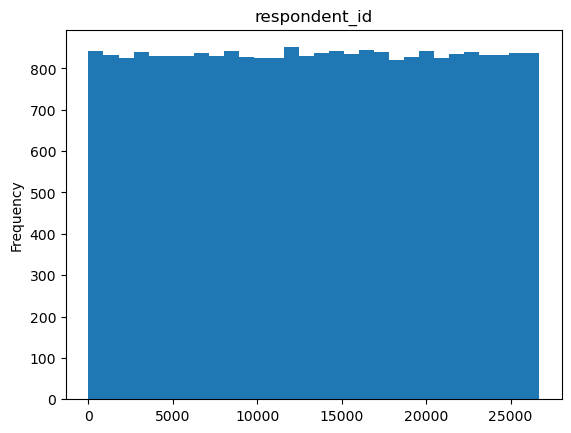

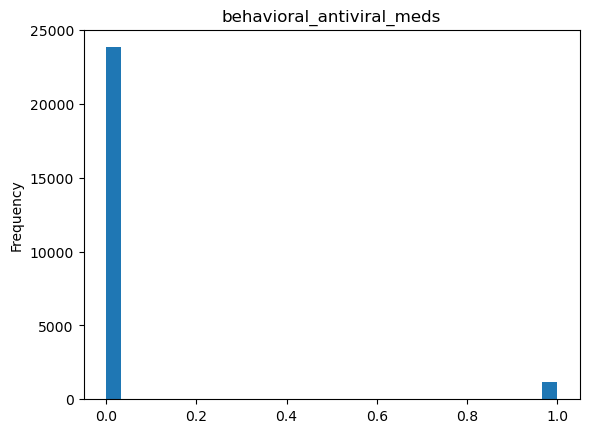

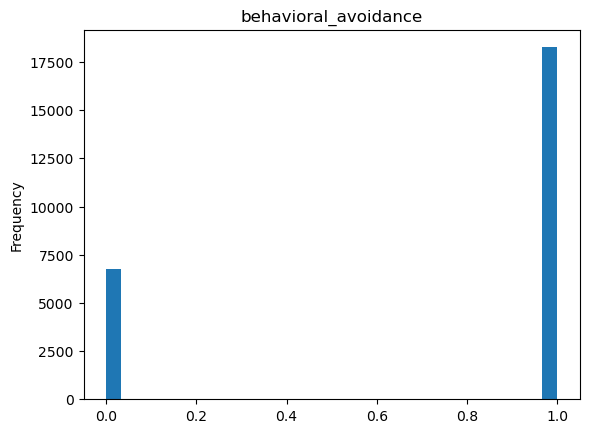

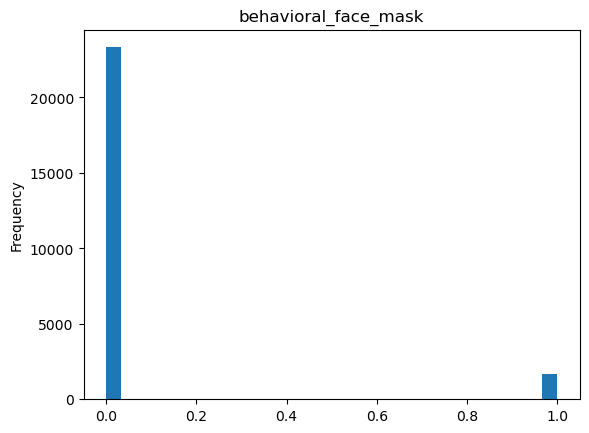

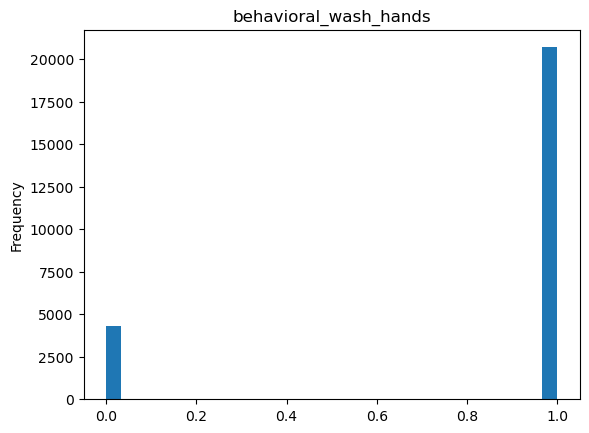

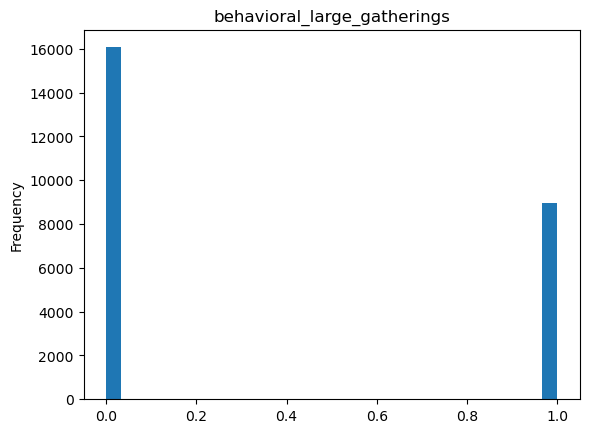

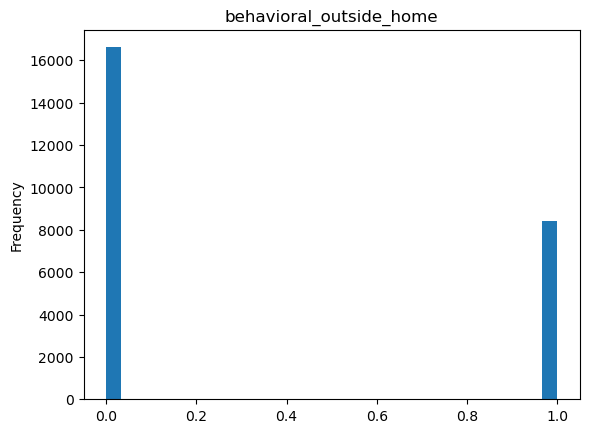

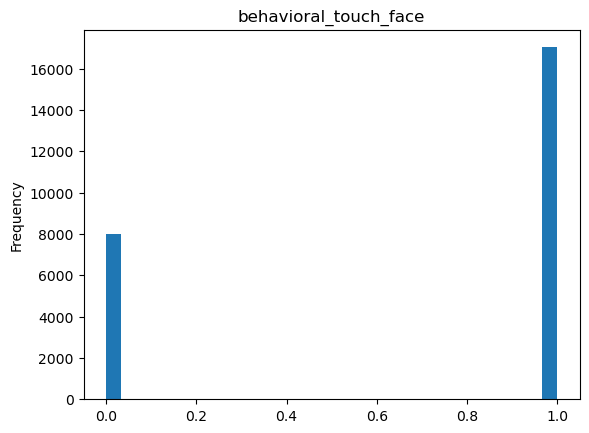

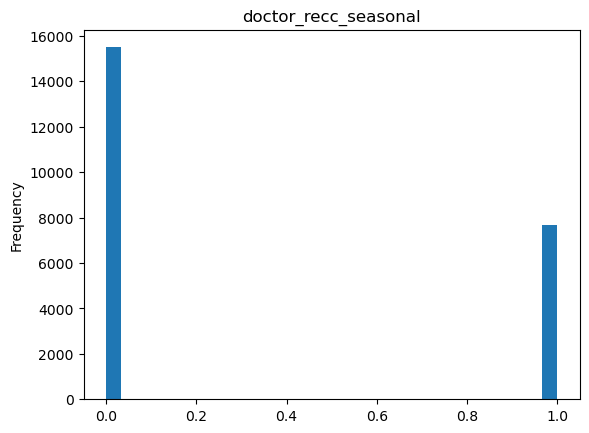

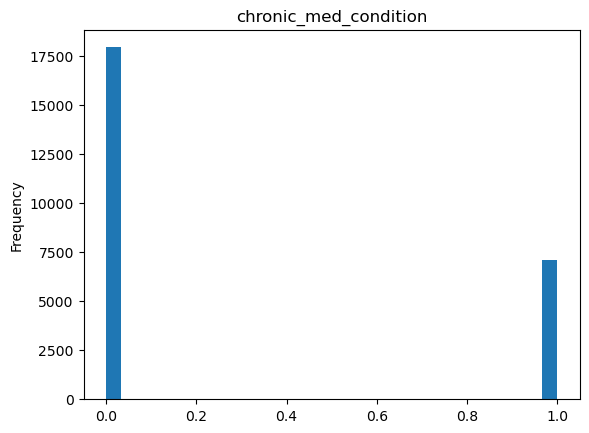

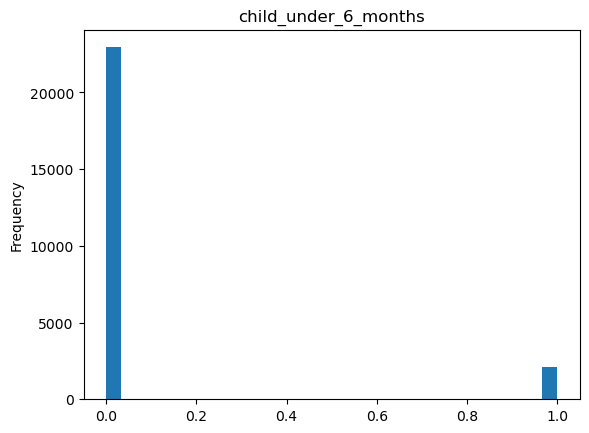

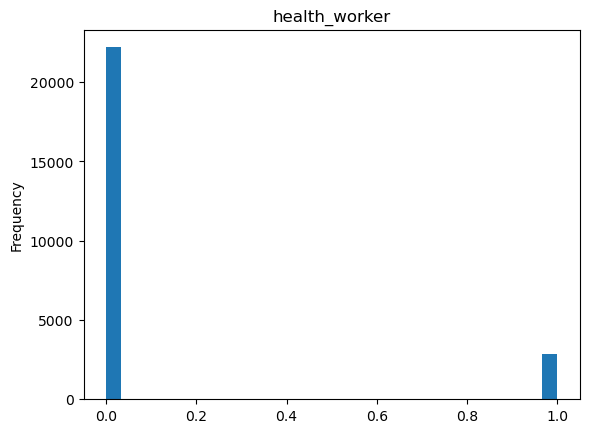

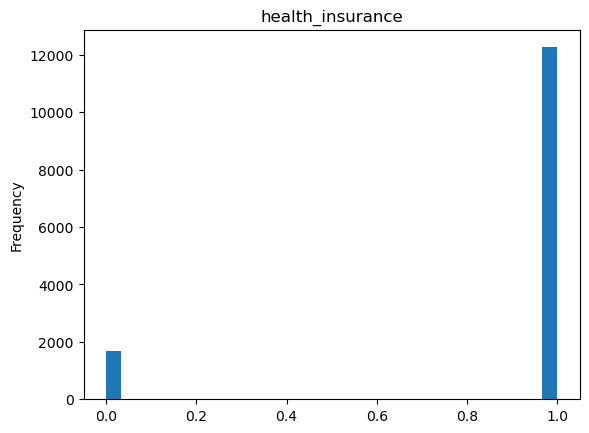

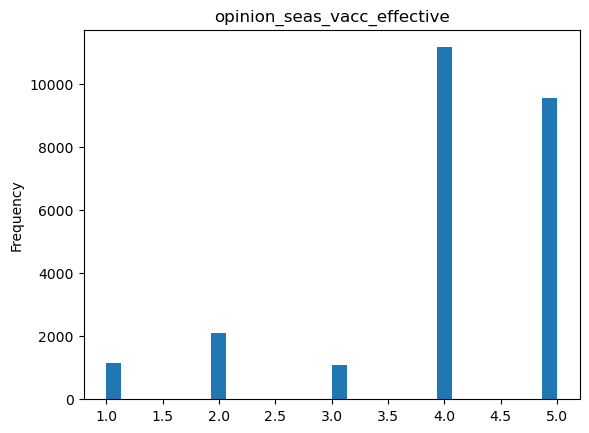

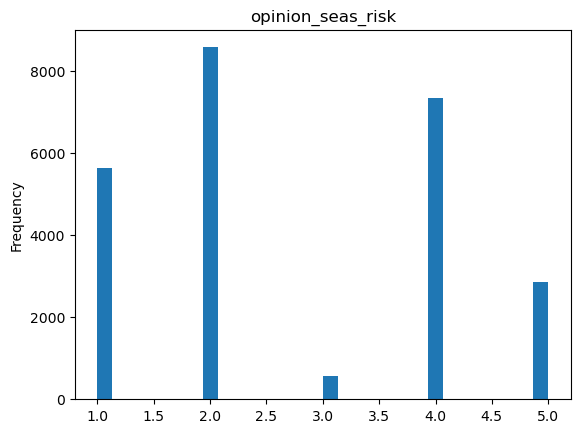

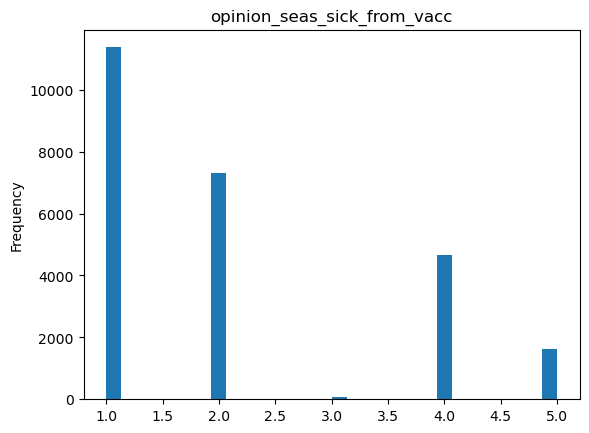

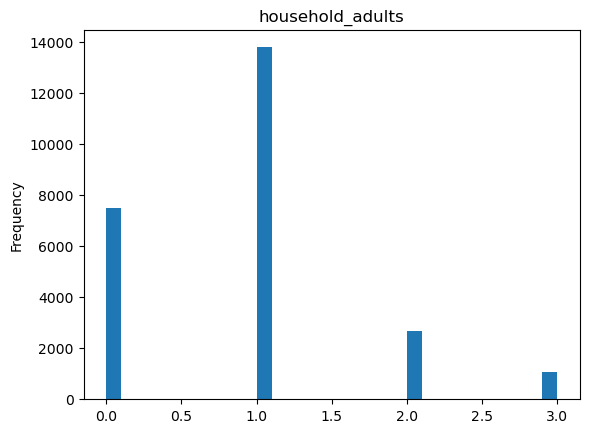

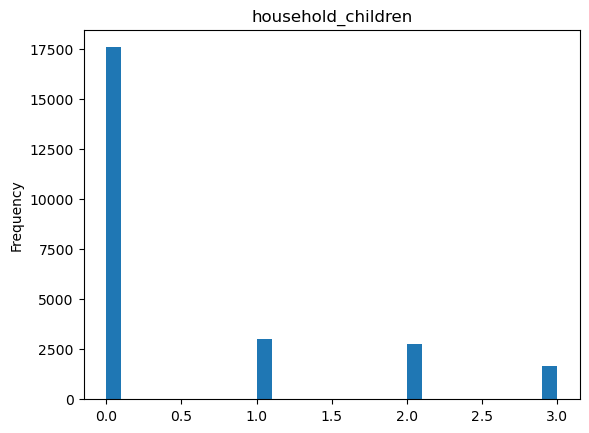

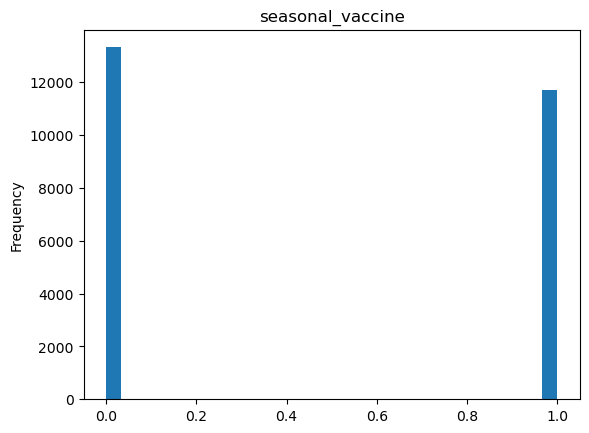

In [157]:
#Histogram plots for numeric values for individual variables
for column in numeric_df:
    fig, ax = plt.subplots()
    df[column].plot(kind = 'hist', bins = 30, title = column)
    plt.show()

In [158]:
#Plotting for categorical variables
categorical_columns = ['age_group', 'education','sex', 'income_poverty', 'marital_status', \
                       'rent_or_own', 'employment_status','hhs_geo_region', 'census_msa', 'race',\
                       'doctor_recc_seasonal', 'health_insurance'].copy()

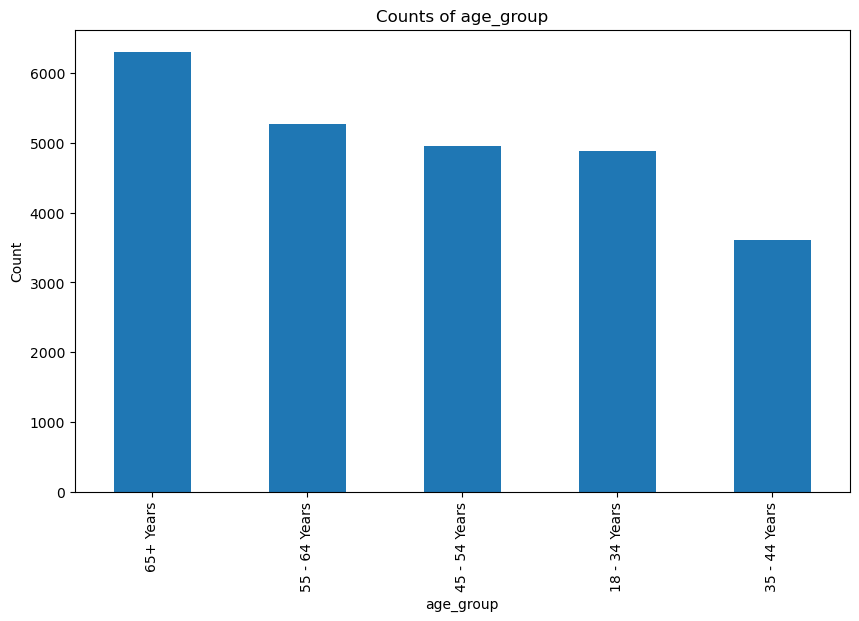

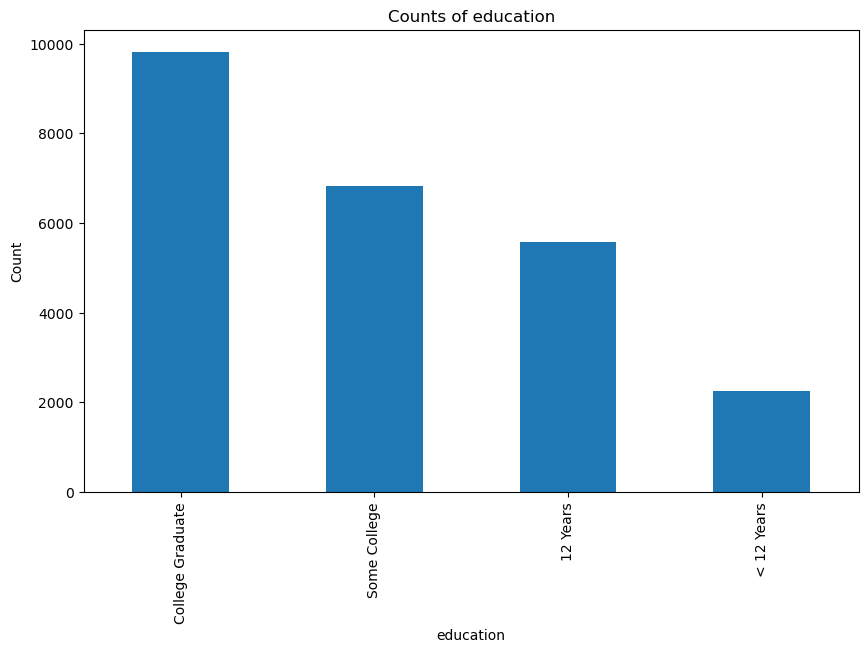

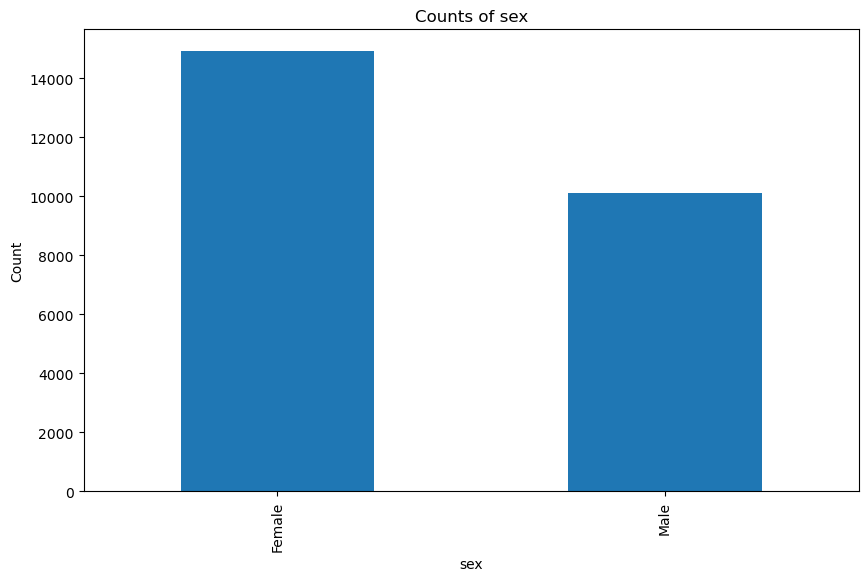

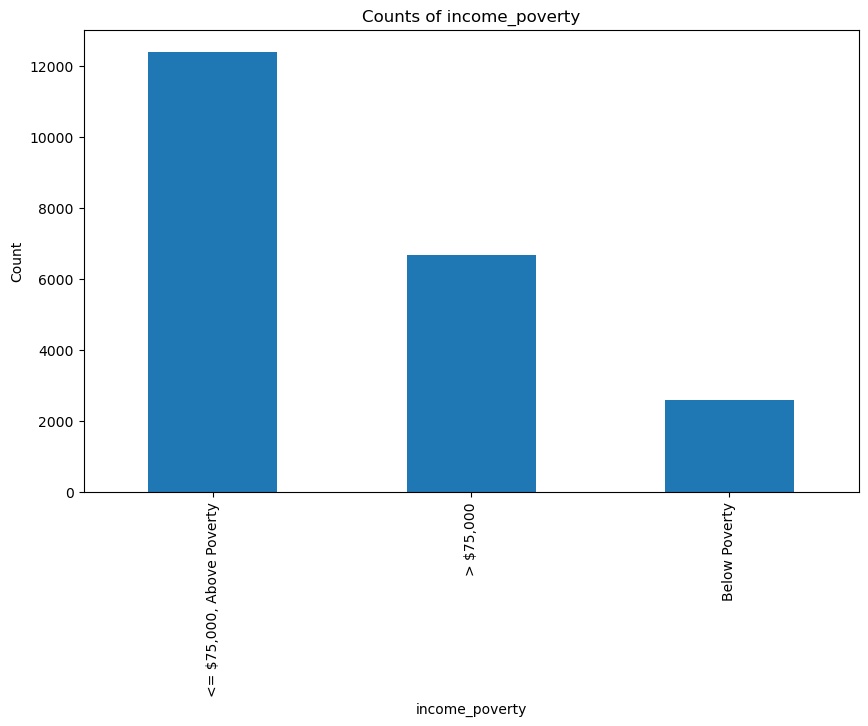

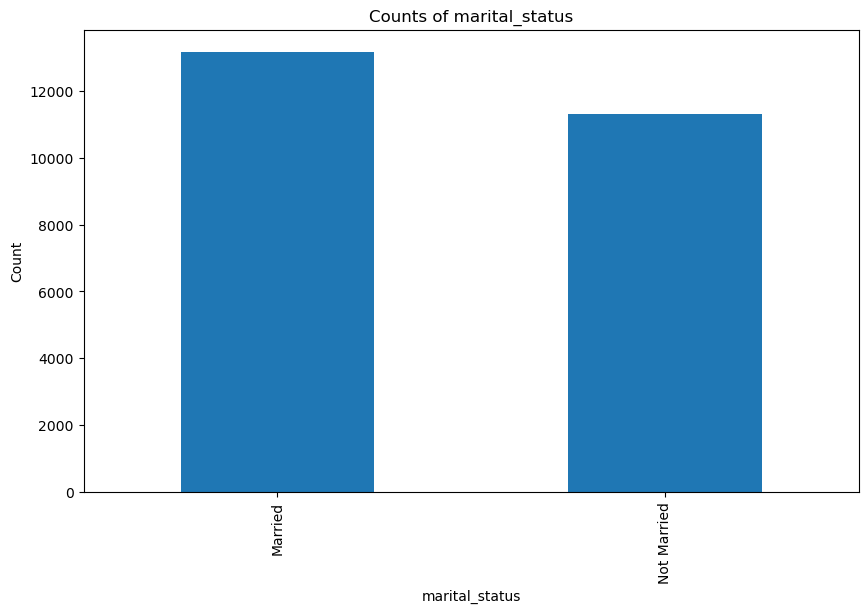

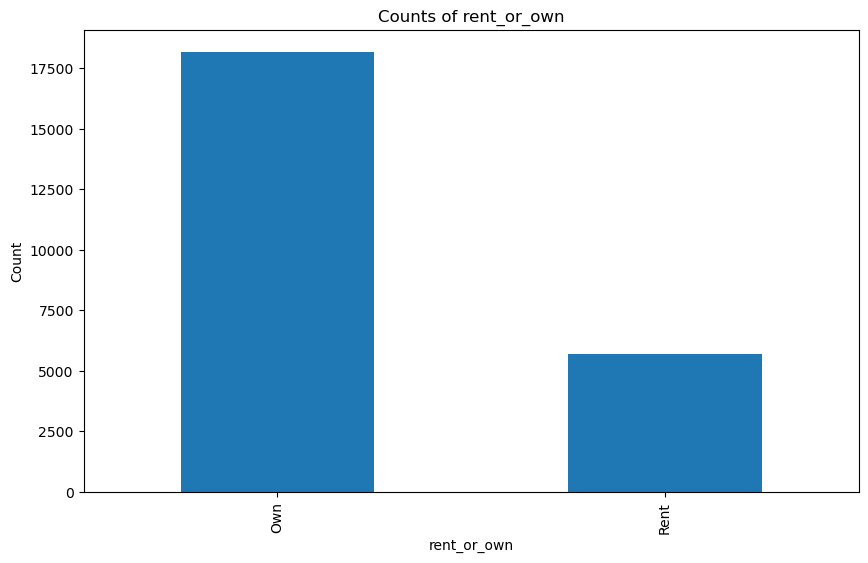

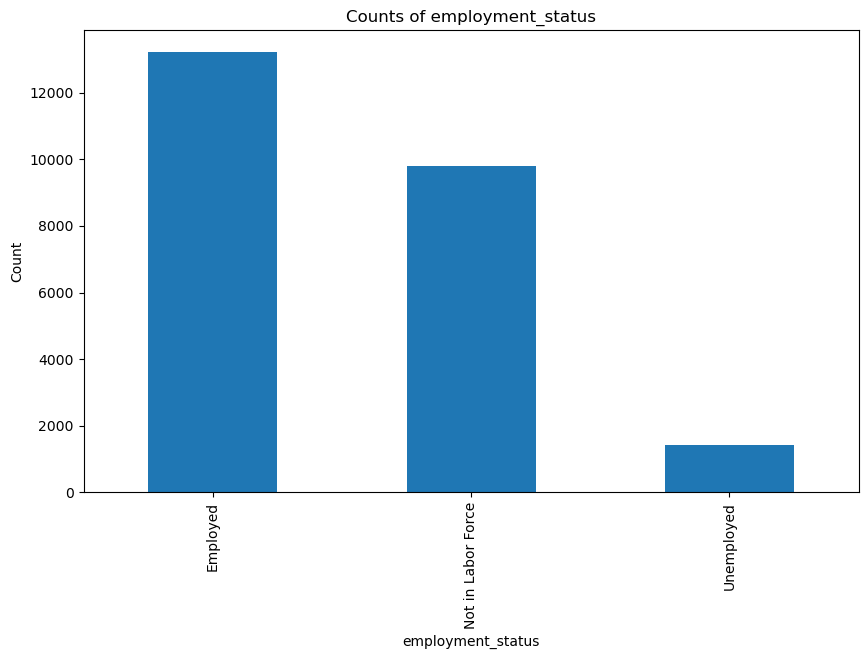

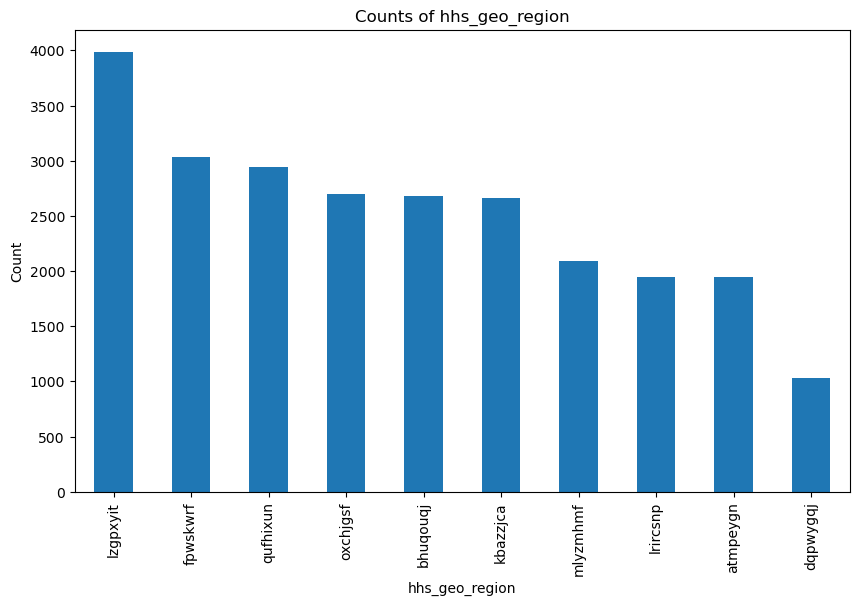

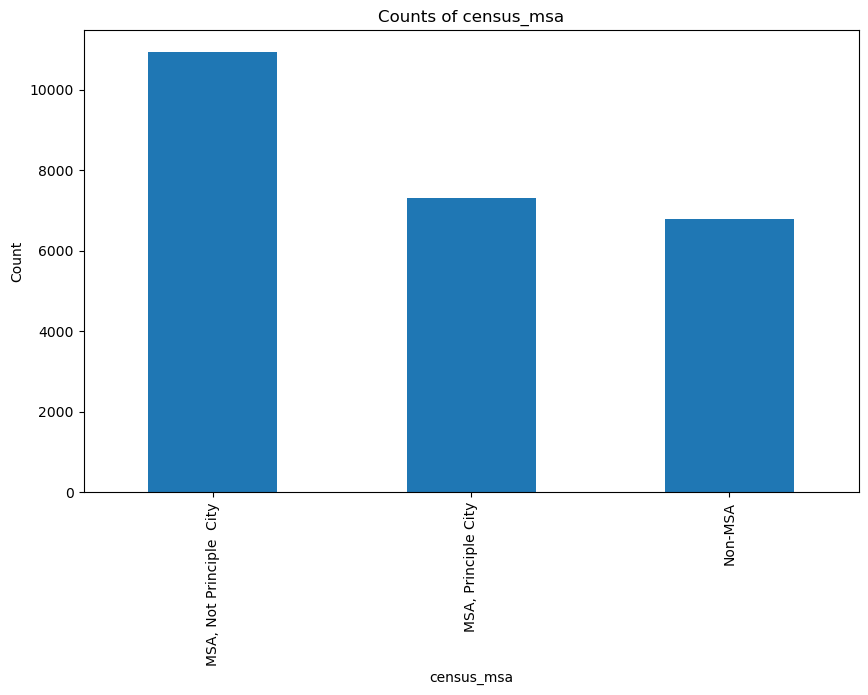

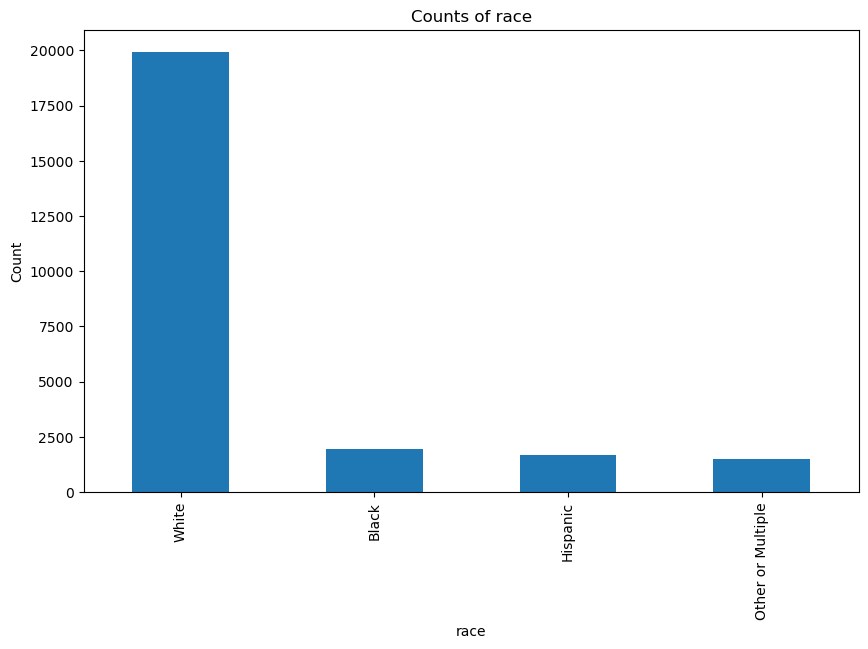

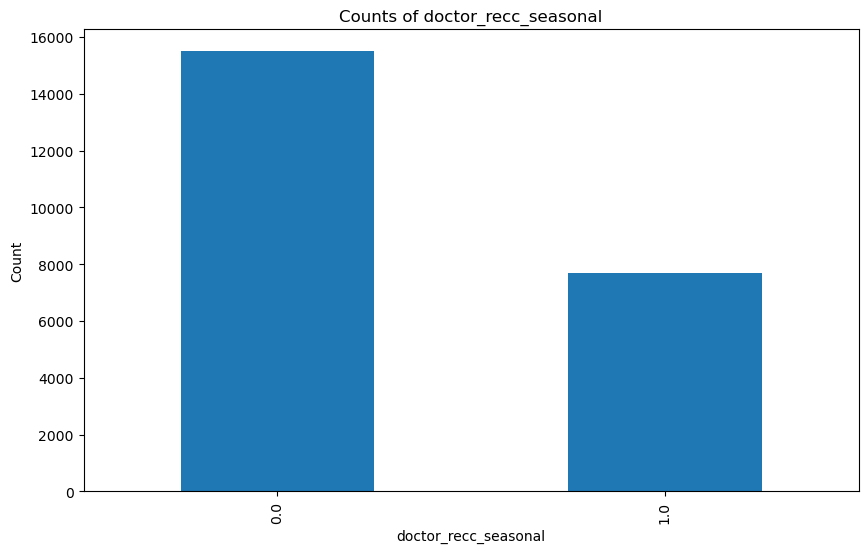

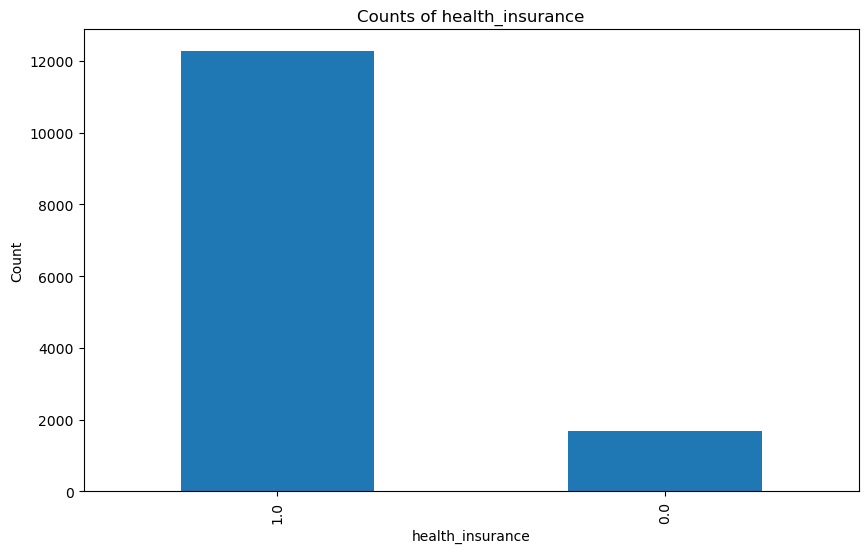

In [159]:
#Plotting categorical data
for column in categorical_columns:
    # Create a bar plot for the current column
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Counts of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

## 5.2 Bivariate analysis

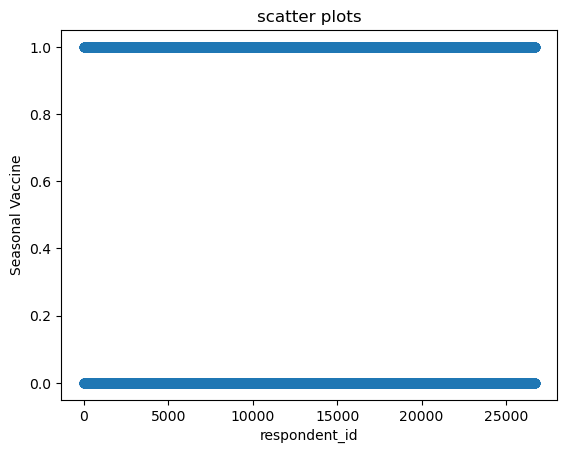

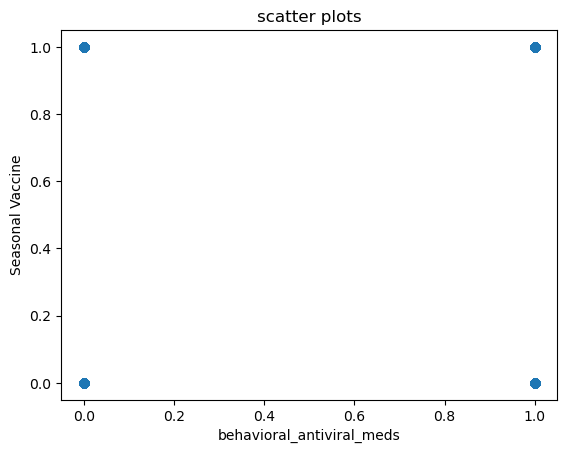

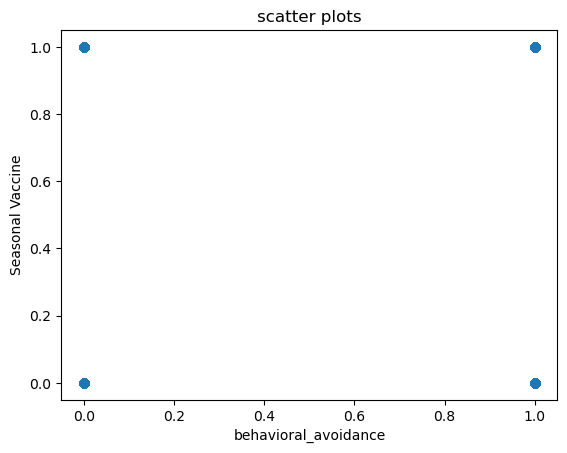

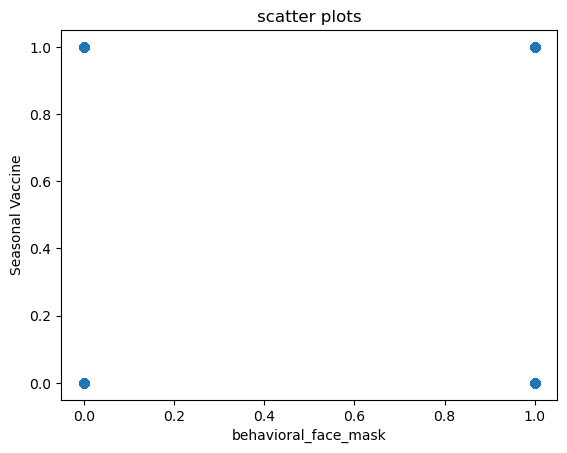

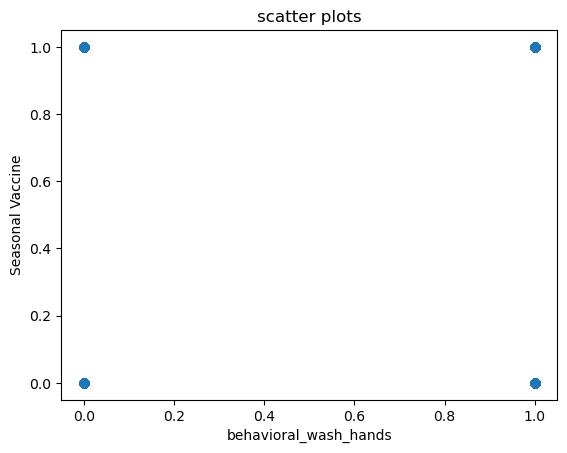

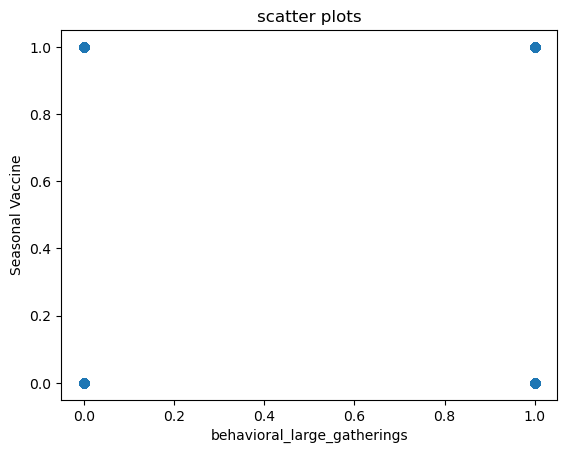

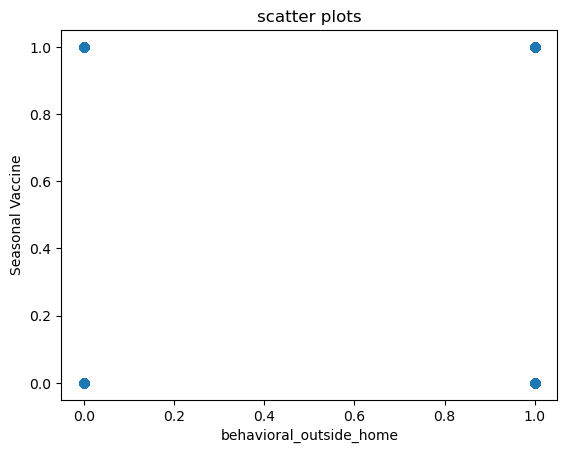

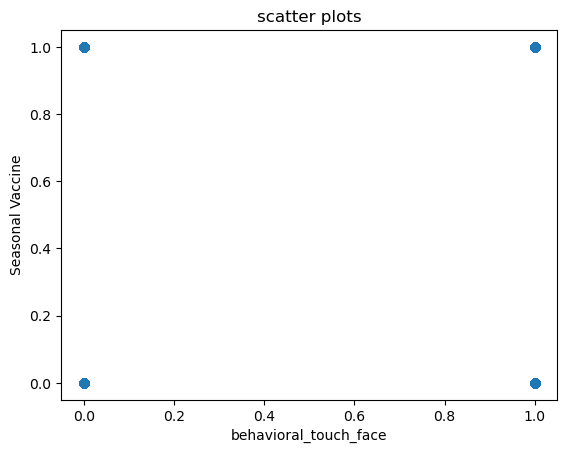

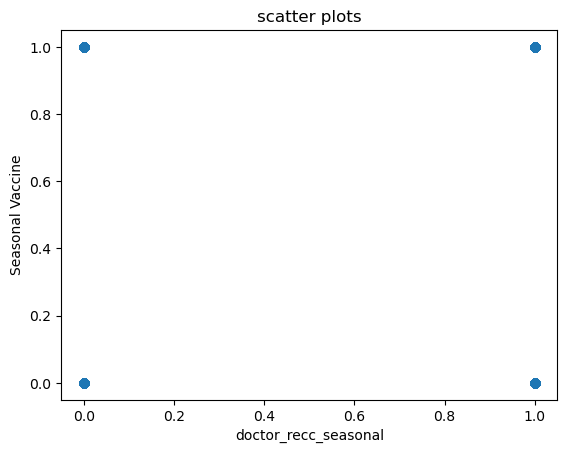

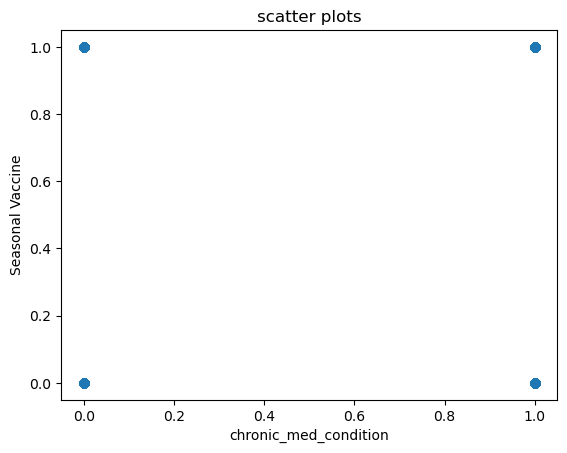

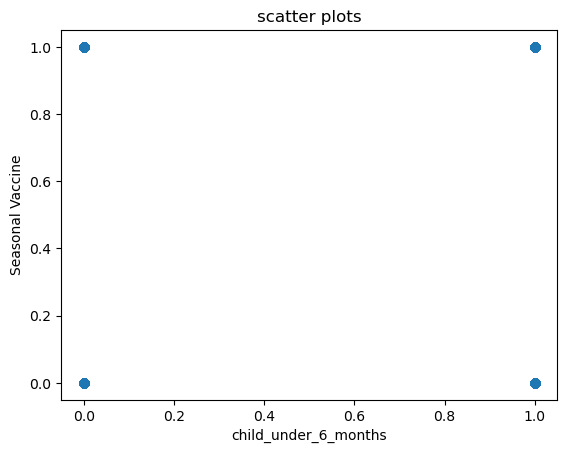

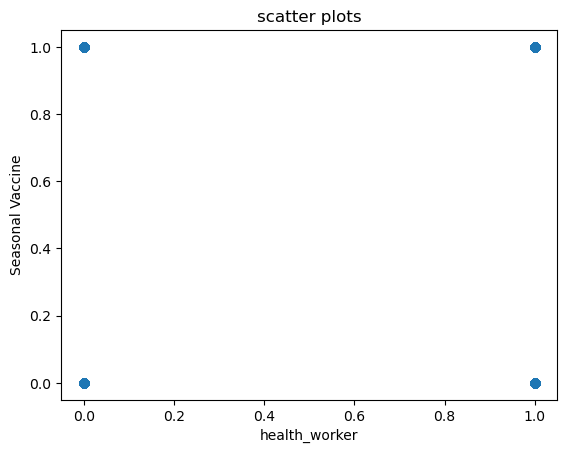

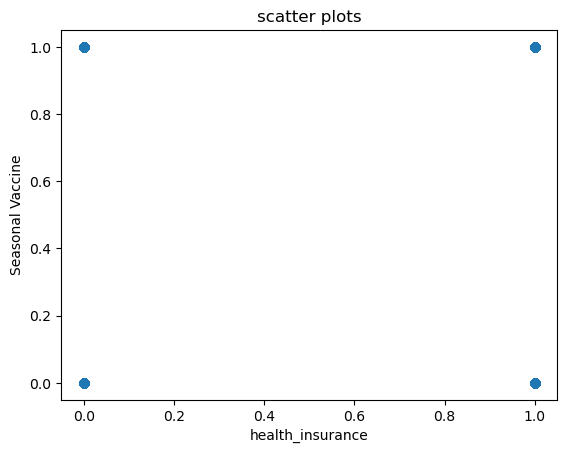

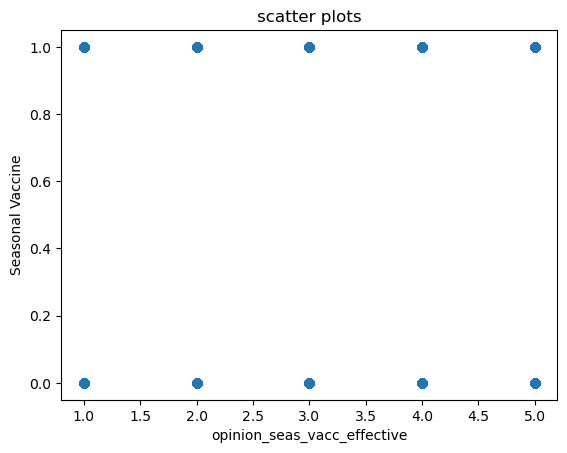

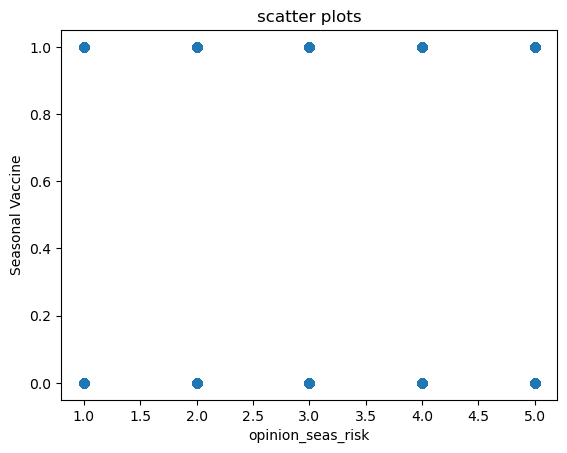

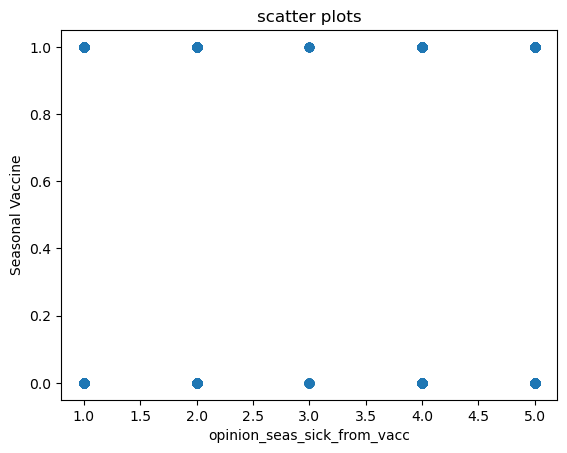

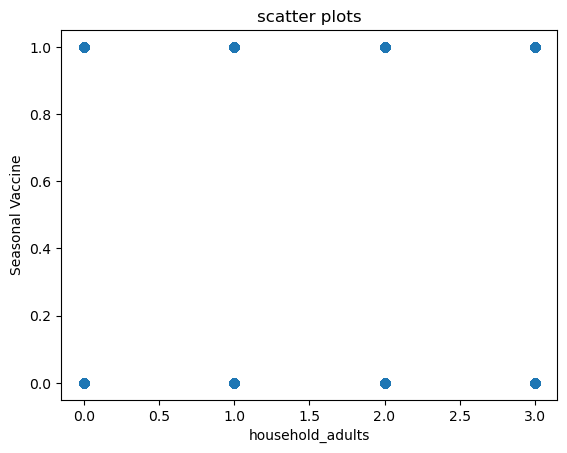

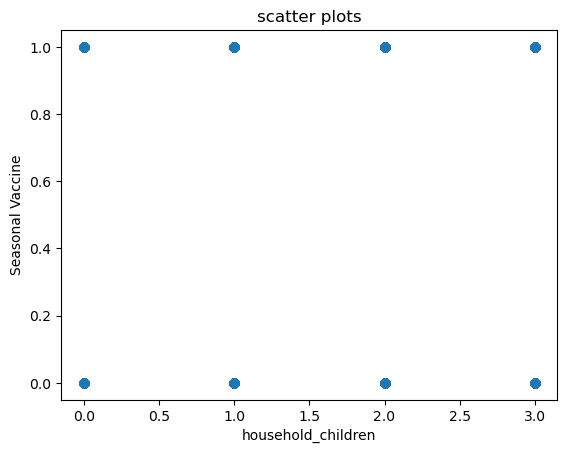

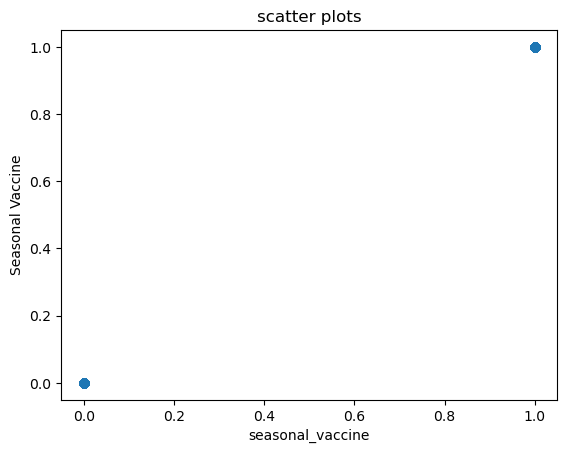

In [160]:
#Displaying scatter plot for each numeric column and the target variable
for column in numeric_columns:
# plot scatter plots for each item in the numeric list.    
    plt.scatter(df[column], df['seasonal_vaccine'])
# set labels and title
    plt.xlabel(column)
    plt.ylabel('Seasonal Vaccine')
    plt.title('scatter plots')
# display the plot.
    plt.show()

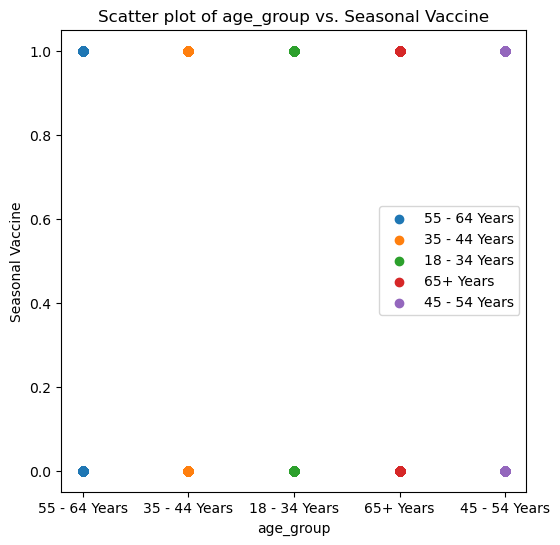

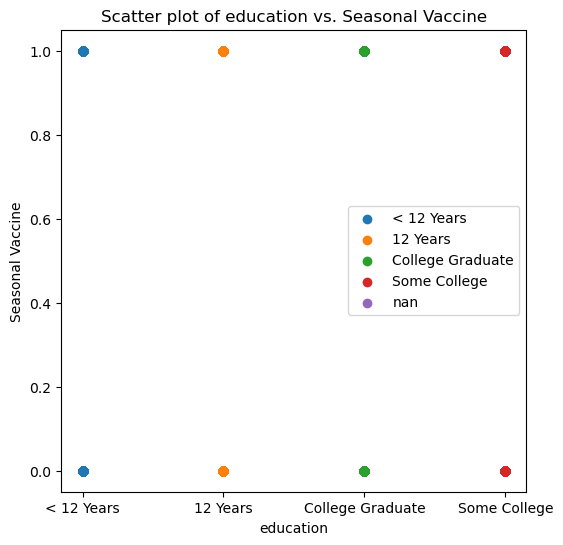

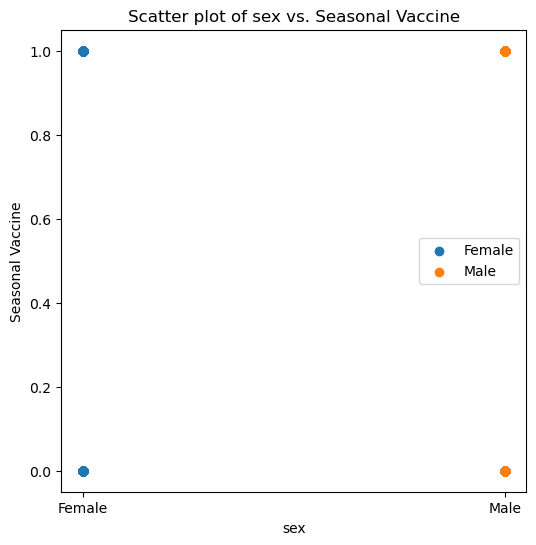

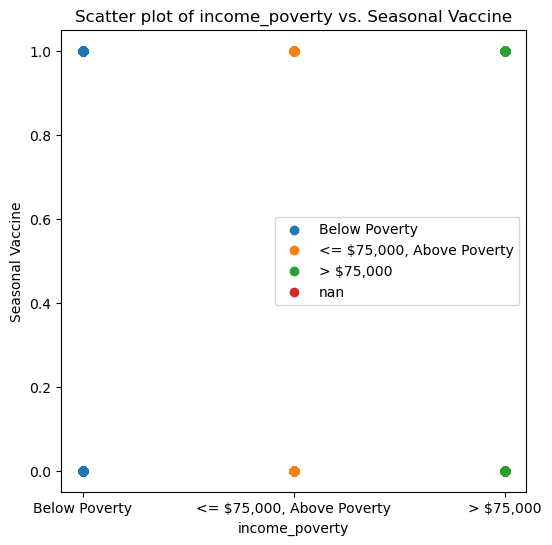

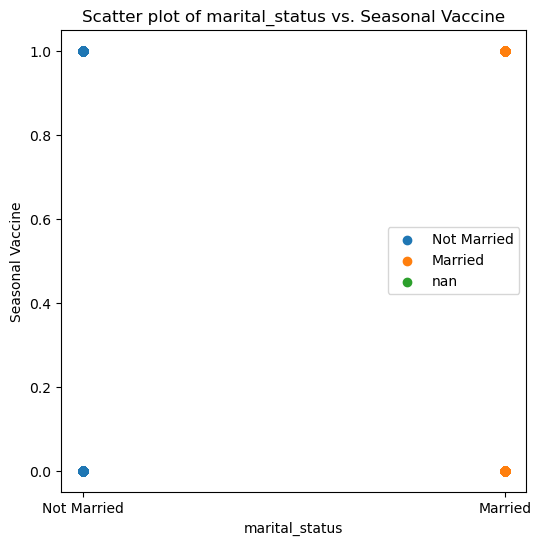

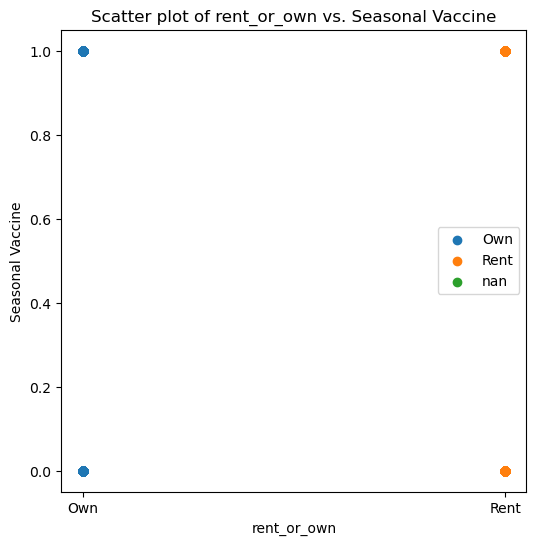

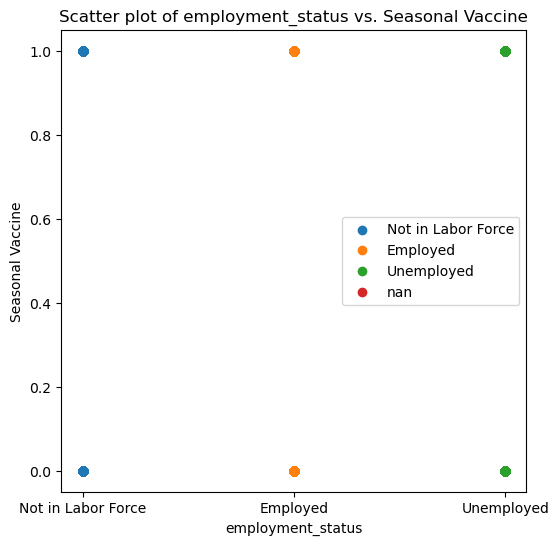

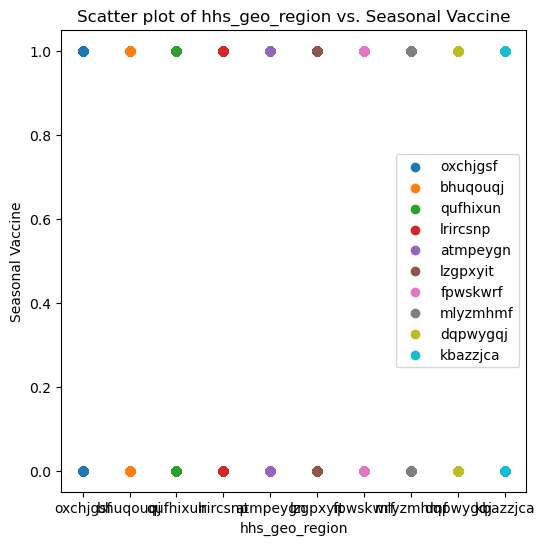

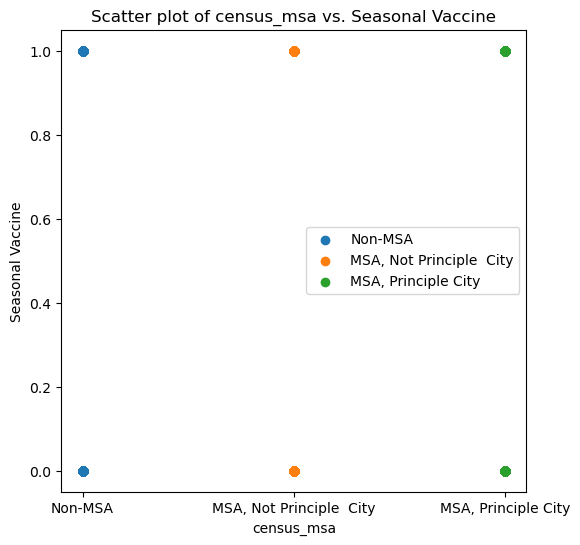

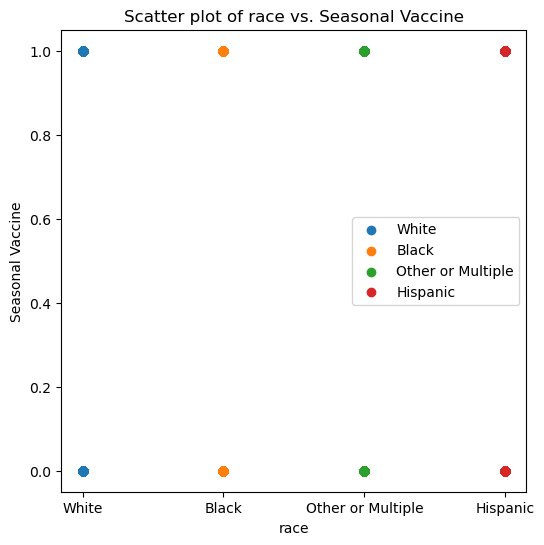

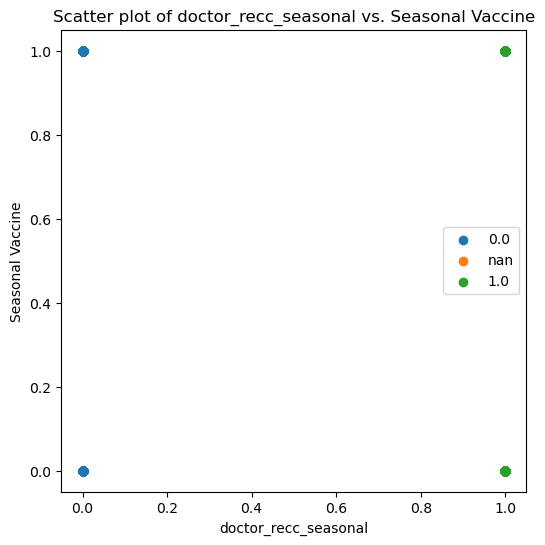

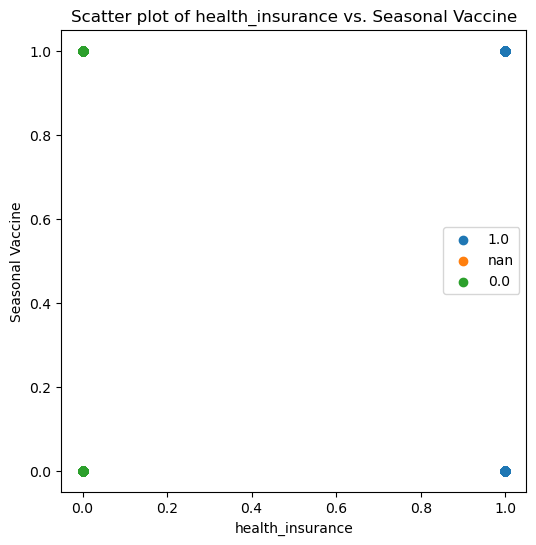

In [161]:
for column in categorical_columns:
    # Create a scatter plot for the current column
    plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
    for category in df[column].unique():
        plt.scatter(df[df[column] == category][column], df[df[column] == category]['seasonal_vaccine'], label=category)
    plt.title(f'Scatter plot of {column} vs. Seasonal Vaccine')
    plt.xlabel(column)
    plt.ylabel('Seasonal Vaccine')
    plt.legend()
    plt.show()

# 6. Feature Engineering

In [162]:
#Displaying a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25026 entries, 0 to 26706
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                25026 non-null  int64  
 1   behavioral_antiviral_meds    25026 non-null  float64
 2   behavioral_avoidance         25026 non-null  float64
 3   behavioral_face_mask         25026 non-null  float64
 4   behavioral_wash_hands        25026 non-null  float64
 5   behavioral_large_gatherings  25026 non-null  float64
 6   behavioral_outside_home      25026 non-null  float64
 7   behavioral_touch_face        25026 non-null  float64
 8   doctor_recc_seasonal         23170 non-null  float64
 9   chronic_med_condition        25026 non-null  float64
 10  child_under_6_months         25026 non-null  float64
 11  health_worker                25026 non-null  float64
 12  health_insurance             13953 non-null  float64
 13  opinion_seas_vacc_eff

Let's create a new variable  that represents an individual's behavioral efforts to avoid the flu, excluding vaccination. We will sum up all binary columns, where a value of 1 indicates a behavior that reduces the risk of contracting the flu. A higher flu_avoidance_score will indicate a more careful and flu-conscious individual.

In [163]:
#grouping all columns with behavioral characteristics
behavior_cols = [col for col in df.columns if 'behavioral' in col]
behavior_cols


['behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face']

,count
behav_score,
3.0,6856
5.0,4306
2.0,4272
4.0,4066
1.0,2458
0.0,1942
6.0,973
7.0,153


<Figure size 700x500 with 0 Axes>

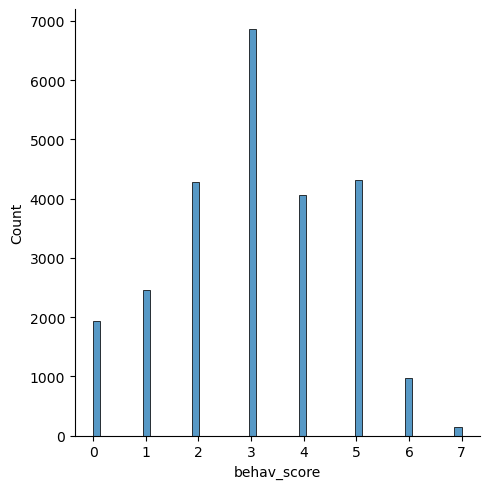

In [164]:
# In a Df and specific column name and returns a Pandas DataFrame 
# displaying the unique values in that column as well as the count of each unique value. 
# Also displays a histogram (Seaborn distplot) showing the distribution of the column values.
def check_col_distr(df, col):    
    ## check counts of unique values in col
    display(check_unique(df, col))
     ## plot distribution of col
    plt.figure(figsize=(7,5))
    fig = sns.displot(df[col])
    
    return fig
       
df['behav_score'] = df[behavior_cols].sum(axis=1)
check_col_distr(df, 'behav_score');

Create a variable that represents the ratio of how much an individual has done behaviorally to avoid the flu (aside from getting vaccinated) to their perception of the risk of getting the flu without the vaccine.

The numerator of the ratio is behav_score + 1, which ranges from 1 to 7. This is to differentiate among individuals who are not taking any action to avoid the flu, but differ in the degree to which they are concerned about getting sick without the vaccine. An individual with a score of 1 has done nothing to avoid the flu but is very concerned about getting sick without the vaccine. An individual with a score of 7 has done everything they can to avoid the flu and is not very concerned about getting sick without the vaccine.

The denominator of the ratio is the rating of risk perception, opinion_seas_risk, which ranges from 1 to 5. This represents the individual's perception of the risk of getting the flu without the vaccine. An individual with a score of 1 believes that the risk of getting the flu without the vaccine is very low. An individual with a score of 5 believes that the risk of getting the flu without the vaccine is very high.

The flu_avoidance_behavior_to_risk_ratio variable can be used to understand how an individual's behavioral risk avoidance and risk perception relate to their likelihood of getting the flu vaccine. An individual with a low flu_avoidance_behavior_to_risk_ratio is more likely to get the flu vaccine, as they are both concerned about getting sick and have not taken many steps to avoid the flu. An individual with a high flu_avoidance_behavior_to_risk_ratio is less likely to get the flu vaccine, as they are not very concerned about getting sick and have taken many steps to avoid the flu.

,count
behav_to_risk,
1.000000,4664
2.000000,3398
1.500000,3130
3.000000,2268
4.000000,1362
1.250000,1352
2.500000,1284
0.500000,1208
0.750000,1155


<Figure size 700x500 with 0 Axes>

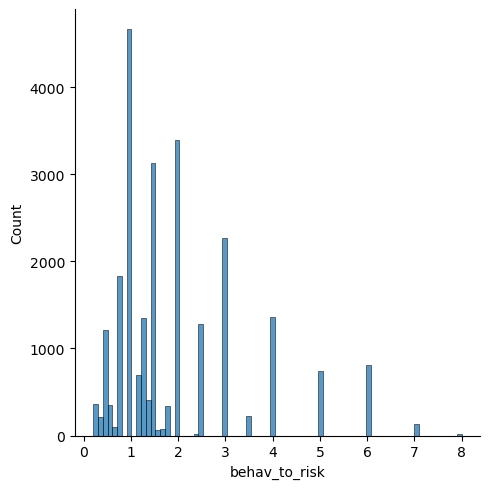

In [165]:
df['behav_to_risk'] = (df['behav_score'] + 1) / df['opinion_seas_risk']

# check counts of unique values in new col and plot distribution
check_col_distr(df, 'behav_to_risk');

Creating a variable for whether or not an individual is 65 years or older as this represents a group at higher risk for serious complications from the flu.

,count
older_65,
0,18719
1,6307


<Figure size 700x500 with 0 Axes>

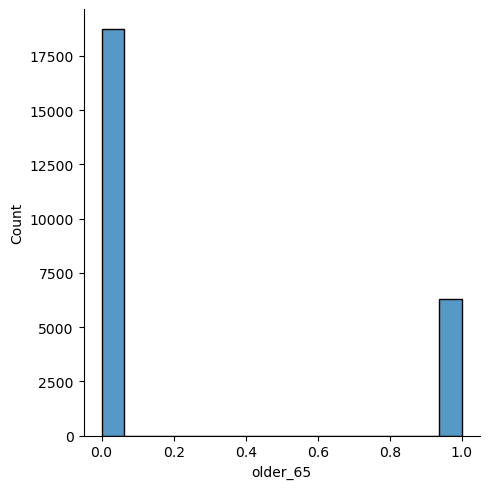

In [166]:
def is_older_65(row):
    if row['age_group'] == '65+ Years':
        return 1
    else:
        return 0

# apply the function to create new column
df['older_65'] = df.apply(lambda x: is_older_65(x), axis=1)

##check counts of unique values in new col and plot distribution
check_col_distr(df, 'older_65');

Define a variable to represent an individual's overall risk of developing flu-related complications. This risk is influenced by certain factors that make some individuals more susceptible to severe flu outcomes. Those at higher risk include:

1. Individuals aged **65 years and older**.
2. **Children 6 months or younger**, as well as people in close contact with a child under 6 months, since they share an increased risk.
3. People with **chronic medical conditions**, such as asthma, other lung conditions, diabetes, heart conditions, kidney conditions, sickle cell anemia or other anemia, neurological or neuromuscular conditions, liver conditions, or weakened immune systems.

The variable serves to acknowledge the heightened vulnerability of these groups to flu-related complications, providing valuable information for public health assessments and interventions.
(<a href="https://www.cdc.gov/flu/highrisk/index.htm"> CDC - "People at High Risk for Flu Complications"</a>).

,count
high_risk_compl,
0,12916
1,8897
2,3072
3,141


<Figure size 700x500 with 0 Axes>

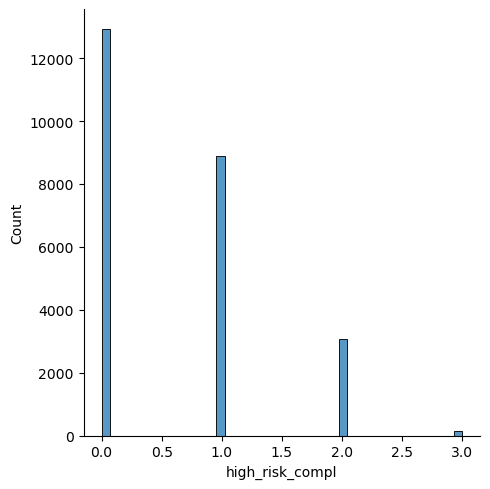

In [167]:
# define a function to calculate score for high risk of complications
def calc_high_risk(row):
    risk = 0
    if row['older_65'] == 1:
        risk += 1
    if row['child_under_6_months'] == 1:
        risk += 1
    if row['chronic_med_condition'] == 1:
        risk += 1
    return risk

## apply the function to create new column
df['high_risk_compl'] = df.apply(lambda x: calc_high_risk(x), axis=1)

## check counts of unique values in new col and plot distribution
check_col_distr(df, 'high_risk_compl');

Creating a categorical variable that groups persons with numerous high risk characteristics ('high_risk_compl' > 1) into one 'high risk' category, assigning a value of 0 to 'low risk' and a value of 1 to'med risk'.

In [168]:
df['high_risk_cat'] = df['high_risk_compl'].map({0:'low risk', 1:'med risk',
                                                 2:'high risk', 3:'high risk'})

## check counts of unique values in new col
df['high_risk_cat'].value_counts()

high_risk_cat
low risk     12916
med risk      8897
high risk     3213
Name: count, dtype: int64

In [169]:
#Checking the first 5 rows
df.head()

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine,behav_score,behav_to_risk,older_65,high_risk_compl,high_risk_cat
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,not employed,not employed,0,2.0,3.0,0,0,low risk
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,4.0,2.5,0,0,low risk
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,NaN,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,1.0,2.0,0,1,med risk
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,not employed,not employed,1,3.0,1.0,1,2,high risk
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,4.0,5.0,0,0,low risk


### Preprocessing

In [170]:
# change binary variable from floats to strings without altering NaN values
#(NaN will be automatically filled with 'missing' later)
df['doctor_recc_seasonal'] = df['doctor_recc_seasonal'].map({1.0: '1', 0.0: '0'})
df['doctor_recc_seasonal'].value_counts(dropna=False)

doctor_recc_seasonal
0      15494
1       7676
NaN     1856
Name: count, dtype: int64

In [171]:
df['health_insurance'] = df['health_insurance'].map({1.0: '1', 0.0: '0'})
df['health_insurance'].value_counts(dropna=False)

health_insurance
1      12265
NaN    11073
0       1688
Name: count, dtype: int64

In [172]:
# since they're so underrepresented in the dataset, 
 # we create a function to return make combine people of color into one category 

def race_func(row):
    if row['race'] == 'White':
        return 'White'
    else:
        return 'POC'

# apply the function to create new column
df['race'] = df.apply(lambda x: race_func(x), axis=1)

# check counts of unique values in new col and plot distribution
df['race'].value_counts(dropna=False)

race
White    19920
POC       5106
Name: count, dtype: int64

In [173]:
 # A list of intermediate engineered features that will be highly correlated
# with other features
feats_to_drop = ['older_65', 'high_risk_compl']

# Drop those features from the DataFrame
for feat in feats_to_drop:
    if feat in df.columns:
        df.drop(columns=feat, inplace=True)


Need to process numerical and categorical variables differently, but right now some categorical variables are still showing up as numeric because NaNs haven't been filled in with 'missing' (this will be done as part of preprocessing pipeline)

In [174]:
null_df = check_null(df)
miss_val_cols = list(null_df.loc[null_df['% Null']>0].index)
miss_val_cols

['marital_status',
 'education',
 'employment_status',
 'employment_industry',
 'employment_occupation',
 'rent_or_own',
 'doctor_recc_seasonal',
 'income_poverty',
 'health_insurance']

In [175]:
# list of all columns that are currently object dtype
obj_cols = list(df.select_dtypes('O').columns)
# add to that list the columns with missing values that will become categorical when 'missing' imputed
 # use set() so no column appears twice in the list since there's some overlap
cat_cols = list(set(obj_cols + miss_val_cols))
cat_cols

['high_risk_cat',
 'sex',
 'rent_or_own',
 'education',
 'health_insurance',
 'census_msa',
 'employment_industry',
 'age_group',
 'income_poverty',
 'marital_status',
 'doctor_recc_seasonal',
 'employment_status',
 'employment_occupation',
 'race',
 'hhs_geo_region']

All the above need to have null values filled with 'missing' so they will all be categorical if they aren't already

In [176]:
# columns to be treated as numeric in pipeline are all the remaining cols in X 
# that are not in cat_cols
num_cols = [col for col in df.drop('seasonal_vaccine', axis=1).columns if col not in cat_cols]
num_cols

['respondent_id',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'behav_score',
 'behav_to_risk']

### Train test split

In [177]:
# define target variable
target = 'seasonal_vaccine'

# separate of features (X) and target (y) for train-test-split
X = df.drop(columns=target, axis=1).copy()
y = df[target].copy()

# define random seed to use for train test split and later for classifiers for reproducibility
random_seed = 319

## split the data into training and test sets prior to preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_seed)

# check for class imbalance across all sets of y
print('**original**\n', y.value_counts(normalize=True), '\n------\n')
print('**y_train**\n', y_train.value_counts(normalize=True), '\n------\n')
print('**y_test**\n', y_test.value_counts(normalize=True), '\n------\n')

**original**
 seasonal_vaccine
0    0.531927
1    0.468073
Name: proportion, dtype: float64 
------

**y_train**
 seasonal_vaccine
0    0.531169
1    0.468831
Name: proportion, dtype: float64 
------

**y_test**
 seasonal_vaccine
0    0.534958
1    0.465042
Name: proportion, dtype: float64 
------



In [178]:
# Impute and scale numerical features
num_imputer = SimpleImputer(strategy='mean')
X_train_num = num_imputer.fit_transform(X_train[num_cols])
X_test_num = num_imputer.transform(X_test[num_cols])

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [179]:
# Impute and encode categorical features
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
X_train_cat = cat_imputer.fit_transform(X_train[cat_cols])
X_test_cat = cat_imputer.transform(X_test[cat_cols])

encoder = OneHotEncoder(handle_unknown='error', sparse=False, drop='if_binary')
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

# Combine transformed numerical and categorical data
X_train_combined = np.concatenate((X_train_num, X_train_cat_encoded), axis=1)
X_test_combined = np.concatenate((X_test_num, X_test_cat_encoded), axis=1)


In [180]:
# Get feature names
num_feature_names = num_cols
cat_feature_names = encoder.get_feature_names_out(input_features=cat_cols)
feature_names = np.concatenate((num_feature_names, cat_feature_names))

print(feature_names)
print(len(feature_names))

['respondent_id' 'behavioral_antiviral_meds' 'behavioral_avoidance'
 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'chronic_med_condition' 'child_under_6_months'
 'health_worker' 'opinion_seas_vacc_effective' 'opinion_seas_risk'
 'opinion_seas_sick_from_vacc' 'household_adults' 'household_children'
 'behav_score' 'behav_to_risk' 'high_risk_cat_high risk'
 'high_risk_cat_low risk' 'high_risk_cat_med risk' 'sex_Male'
 'rent_or_own_Own' 'rent_or_own_Rent' 'rent_or_own_missing'
 'education_12 Years' 'education_< 12 Years' 'education_College Graduate'
 'education_Some College' 'education_missing' 'health_insurance_0'
 'health_insurance_1' 'health_insurance_missing'
 'census_msa_MSA, Not Principle  City' 'census_msa_MSA, Principle City'
 'census_msa_Non-MSA' 'employment_industry_arjwrbjb'
 'employment_industry_atmlpfrs' 'employment_industry_cfqqtusy'
 'employment_industry_dotnnunm' 'employment_industry_fcxhlnw

In [181]:
# Create preprocessed DataFrames
preprocessed_train_df = pd.DataFrame(X_train_combined, columns=feature_names)
preprocessed_test_df = pd.DataFrame(X_test_combined, columns=feature_names)

# Display preprocessed DataFrames
print(preprocessed_train_df)
print(preprocessed_test_df)


       respondent_id  behavioral_antiviral_meds  behavioral_avoidance   
0            20575.0                        0.0                   0.0  \
1             9544.0                        0.0                   1.0   
2            12607.0                        0.0                   1.0   
3             8067.0                        0.0                   0.0   
4            23863.0                        0.0                   1.0   
...              ...                        ...                   ...   
20015        16505.0                        0.0                   1.0   
20016           89.0                        0.0                   0.0   
20017         6651.0                        0.0                   1.0   
20018        16084.0                        0.0                   1.0   
20019         4124.0                        1.0                   1.0   

       behavioral_face_mask  behavioral_wash_hands   
0                       0.0                    1.0  \
1              

In [182]:
preprocessed_train_df.info()
preprocessed_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20020 entries, 0 to 20019
Columns: 114 entries, respondent_id to hhs_geo_region_qufhixun
dtypes: float64(114)
memory usage: 17.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5006 entries, 0 to 5005
Columns: 114 entries, respondent_id to hhs_geo_region_qufhixun
dtypes: float64(114)
memory usage: 4.4 MB


# 7. Data Modelling

## 7.1 Logistic Regression

Accuracy: 0.7634838194167
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2678
           1       0.75      0.74      0.74      2328

    accuracy                           0.76      5006
   macro avg       0.76      0.76      0.76      5006
weighted avg       0.76      0.76      0.76      5006



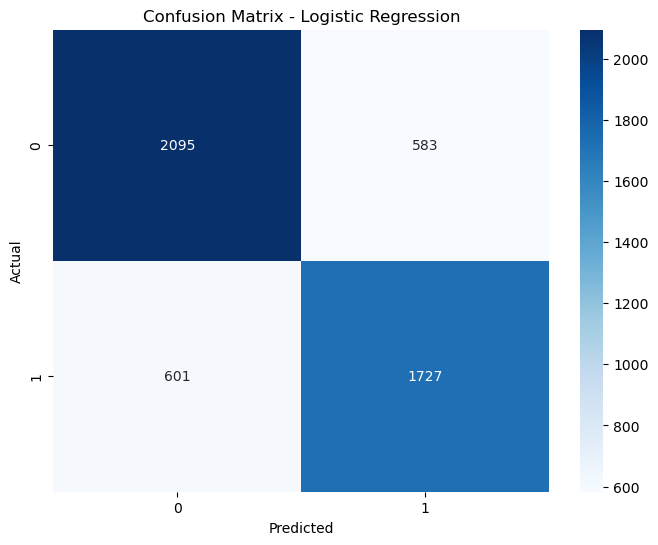

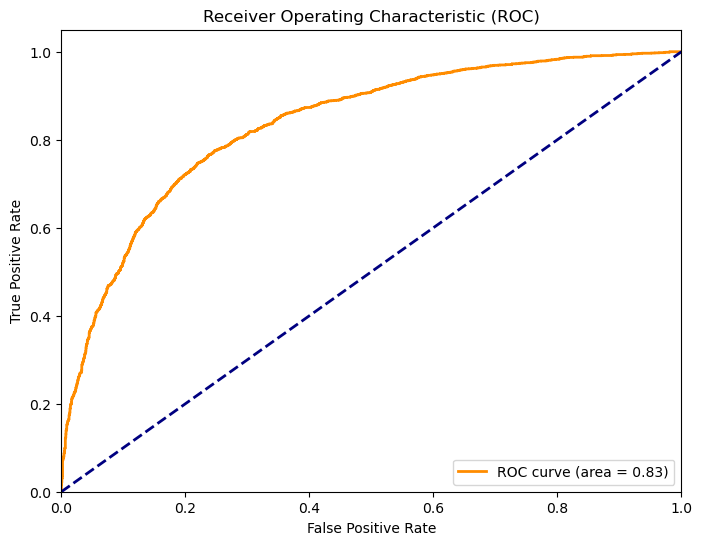

In [183]:

# Create a Logistic Regression model
logreg = LogisticRegression(random_state=random_seed,C = 0.1)

# Fit the logistic regression model using the encoded data
logreg.fit(preprocessed_train_df, y_train)

# Make predictions on the test data
y_pred = logreg.predict(preprocessed_test_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))

# Plot confusion matrix

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Calculate ROC curve and AUC
y_prob = logreg.predict_proba(preprocessed_test_df)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


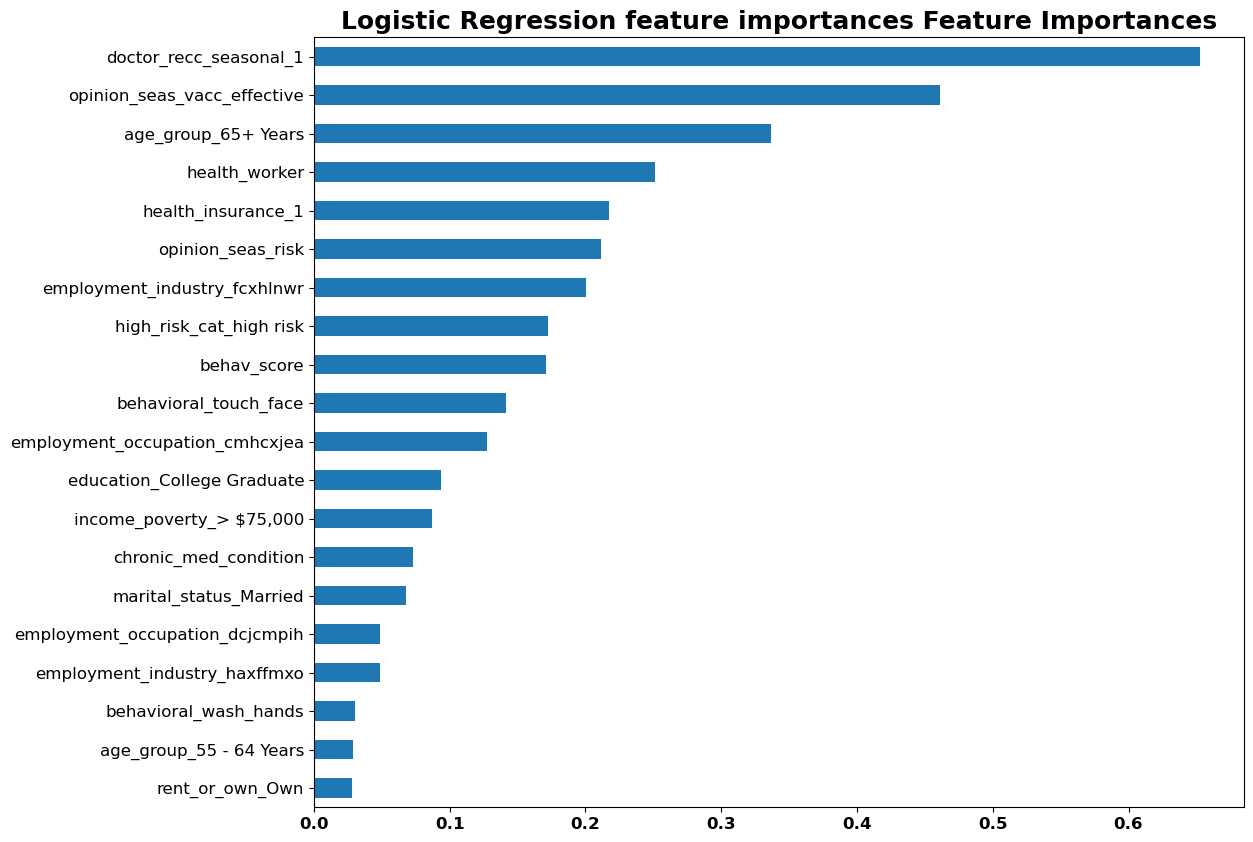

In [184]:
model_title = 'Logistic Regression feature importances'
def plot_feat_importance (logreg, feature_names, ):
  """Plots the feature importances of a LogisticRegression model using Seaborn."""

  # Retrieve feature importances from the model
  feature_importances = logreg.coef_[0]
  model_title = 'Logistic Regression feature importances'
  # Create a pandas Series to hold feature importances with feature names as index
  importance = pd.Series(feature_importances, index=feature_names)

  # Plot the feature importances using Seaborn
  plt.figure(figsize=(12,10))
  fig = importance.sort_values().tail(20).plot(kind='barh')
  fig.set_title('{} Feature Importances'.format(model_title), fontsize=18, fontweight='bold')
  plt.xticks(fontsize=12, fontweight='bold')
  plt.yticks(fontsize=12)
  plt.show()

plot_feat_importance(logreg, feature_names)



The above graph shows the importance of various logistics regression features in our study. The graph shows that the top 20 most important features for predicting whether a person will get vaccinated for seasonal flu

In [185]:
coefficients = logreg.coef_
intercept = logreg.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-1.01042832e-05 -1.19000344e-02 -1.25157748e-03  2.12654758e-02
   3.06730776e-02 -3.22810998e-04 -8.90187219e-03  1.41649590e-01
   7.30321748e-02 -4.53614916e-02  2.51001424e-01  4.61166834e-01
   2.11509583e-01 -2.79818859e-01 -2.25548187e-01 -1.99116436e-01
   1.71211848e-01 -3.99293978e-01  1.72527979e-01 -4.39025410e-01
   7.65628298e-03 -2.20079343e-01  2.83682361e-02 -2.86263279e-01
  -9.46104857e-04 -1.30770387e-01 -1.24078464e-01  9.33358889e-02
  -9.64299115e-02 -8.98273157e-04 -1.76870975e-01  2.17613319e-01
  -2.99583491e-01 -3.53692156e-02 -9.04990401e-02 -1.32972891e-01
   2.05962718e-02 -2.27799085e-02 -1.61601329e-02 -5.97751307e-03
   2.00405801e-01  4.85029504e-02 -4.38815761e-02 -2.33302808e-02
   6.31008580e-03 -7.20768766e-03  7.65965892e-03 -2.26369380e-02
  -1.14354448e-01 -2.49491872e-03 -3.85758335e-02 -2.35460005e-04
  -5.67448200e-02 -2.27411961e-02 -4.08785091e-02 -8.98073918e-03
  -1.77687417e-02 -6.98945989e-02 -2.76726130e-02 -3.85865409e

The model appears to have reasonably balanced performance, with accuracy, precision, recall, and F1-score in the range of 0.75 to 0.78. The confusion matrix and ROC curve visuals would also provide additional insights into the model's performance, especially regarding false positives and true positives at different threshold levels. The ROC curve and AUC (Area Under the Curve) value give a better understanding of the trade-off between true positive rate and false positive rate for different thresholds.